In [1]:

import pandas as pd 

import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns


In [2]:
df = pd.read_csv(r"D:\MLProjects\ZDatasets\AirlineData\data\Data_Train.csv")
df


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24-03-2019,Banglore,New Delhi,BLR ? DEL,22:20,22-03-2023 01:10,2h 50m,non-stop,No info,3897
1,Air India,01-05-2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,09-06-2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,10-06-2023 04:25,19h,2 stops,No info,13882
3,IndiGo,12-05-2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01-03-2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,09-04-2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10678,Air India,27-04-2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10679,Jet Airways,27-04-2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10680,Vistara,01-03-2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648


# Data Cleaning

In [3]:
df.isnull().sum()


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [4]:

condtion = df['Route'].isnull()==True
df[condtion]



,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9038,Air India,06-05-2019,Delhi,Cochin,NaN,09:45,07-05-2023 09:25,23h 40m,NaN,No info,7480


In [5]:
condtion = df['Total_Stops'].isnull()==True
df[condtion]


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9038,Air India,06-05-2019,Delhi,Cochin,NaN,09:45,07-05-2023 09:25,23h 40m,NaN,No info,7480


In [6]:
# replace missing Value of Route using Mode as Route is categorical COlumn
modeOfRoute = df['Route'].mode()[0]
modeOfRoute

df['Route'].fillna(modeOfRoute,inplace=True)
df.isnull().sum()


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
# replace missing Value of Total_Stops using Mode as Total_Stops is categorical COlumn
modeOfTotal_Stops = df['Total_Stops'].mode()[0]
df['Total_Stops'].fillna(modeOfTotal_Stops,inplace=True)
df.isnull().sum()


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [8]:

# Problem statement is to predict the airfare
# Size of the Data
# View of the Data
# Datatypes 
# Check Missing Values
# how mathematically look like?
# Check if the duplicate Values
# Correlation between columns
# Graph Analysis(CountPlot,barplot,boxplot)


In [9]:
# Size of the Data
df.shape


(10682, 11)

In [10]:
# View of the Data
df


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24-03-2019,Banglore,New Delhi,BLR ? DEL,22:20,22-03-2023 01:10,2h 50m,non-stop,No info,3897
1,Air India,01-05-2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,09-06-2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,10-06-2023 04:25,19h,2 stops,No info,13882
3,IndiGo,12-05-2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01-03-2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,09-04-2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10678,Air India,27-04-2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10679,Jet Airways,27-04-2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10680,Vistara,01-03-2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [11]:
# Datatypes 

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10682 entries, 0 to 10681
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.1+ KB


In [12]:
# Check Missing Values

df.isnull().sum()



Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [13]:
# how mathematically look like?
df.describe()


,Price
count,10682.000000
mean,9086.292735
std,4610.885695
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [14]:
df.duplicated().sum()



220

In [15]:
df.drop_duplicates(inplace=True)


In [16]:
df


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24-03-2019,Banglore,New Delhi,BLR ? DEL,22:20,22-03-2023 01:10,2h 50m,non-stop,No info,3897
1,Air India,01-05-2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,09-06-2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,10-06-2023 04:25,19h,2 stops,No info,13882
3,IndiGo,12-05-2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01-03-2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,09-04-2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10678,Air India,27-04-2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10679,Jet Airways,27-04-2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10680,Vistara,01-03-2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648


<Axes: >

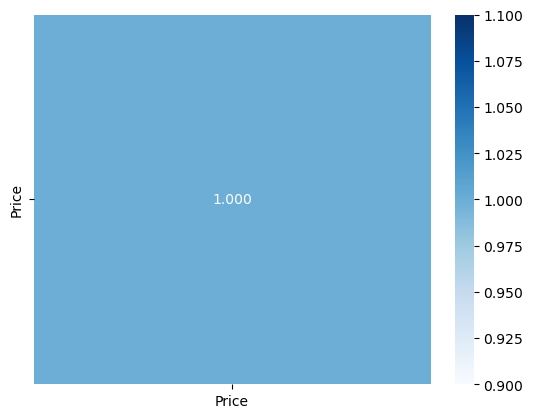

In [17]:
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap='Blues' ,fmt=".3f")


In [18]:
df


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24-03-2019,Banglore,New Delhi,BLR ? DEL,22:20,22-03-2023 01:10,2h 50m,non-stop,No info,3897
1,Air India,01-05-2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,09-06-2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,10-06-2023 04:25,19h,2 stops,No info,13882
3,IndiGo,12-05-2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01-03-2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,09-04-2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10678,Air India,27-04-2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10679,Jet Airways,27-04-2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10680,Vistara,01-03-2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [19]:
print(df['Airline'].value_counts())


Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64


In [20]:
#counts/Unique


# Multiple carriers Premium economy with the Multiple carriers
# Jet Airways Business with Jet Airways
# Vistara Premium economy Vistara 

df['Airline'].replace("Multiple carriers Premium economy","Multiple carriers",inplace=True)
df['Airline'].replace("Jet Airways Business","Jet Airways",inplace=True)
df['Airline'].replace("Vistara Premium economy","Vistara",inplace=True)
print("----------------------")
print(df['Airline'].value_counts())


----------------------
Jet Airways          3706
IndiGo               2043
Air India            1694
Multiple carriers    1209
SpiceJet              815
Vistara               481
Air Asia              319
GoAir                 194
Trujet                  1
Name: Airline, dtype: int64


In [21]:
df['Source'].value_counts()


Delhi       4346
Kolkata     2860
Banglore    2179
Mumbai       696
Chennai      381
Name: Source, dtype: int64

In [22]:
df['Destination'].value_counts()


Cochin       4346
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad     696
Kolkata       381
Name: Destination, dtype: int64

In [23]:
df['Destination'].replace(to_replace="New Delhi",value="Delhi",inplace=True)
df['Destination'].value_counts()


Cochin       4346
Banglore     2860
Delhi        2179
Hyderabad     696
Kolkata       381
Name: Destination, dtype: int64

In [24]:
df.columns


Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [25]:
# Know the Value counts of the categorical Data.

col1 = ['Airline','Source','Destination','Route','Duration','Additional_Info']

for i in col1:
    print(df[i].value_counts())
    print()
    print()


Jet Airways          3706
IndiGo               2043
Air India            1694
Multiple carriers    1209
SpiceJet              815
Vistara               481
Air Asia              319
GoAir                 194
Trujet                  1
Name: Airline, dtype: int64


Delhi       4346
Kolkata     2860
Banglore    2179
Mumbai       696
Chennai      381
Name: Source, dtype: int64


Cochin       4346
Banglore     2860
Delhi        2179
Hyderabad     696
Kolkata       381
Name: Destination, dtype: int64


DEL ? BOM ? COK          2377
BLR ? DEL                1536
CCU ? BOM ? BLR           979
CCU ? BLR                 724
BOM ? HYD                 621
                         ... 
CCU ? VTZ ? BLR             1
CCU ? IXZ ? MAA ? BLR       1
BOM ? COK ? MAA ? HYD       1
BOM ? CCU ? HYD             1
BOM ? BBI ? HYD             1
Name: Route, Length: 128, dtype: int64


2h 50m     544
1h 30m     386
2h 45m     335
2h 55m     332
2h 35m     329
          ... 
36h 25m      1
30h 25m      1
30h 15m

In [26]:
df["hoursMinutes"] = 0
for i in df.index:
    if " " in df.loc[i,'Duration']:
        column1 = df.loc[i,'Duration'].split(" ")[0]
        column2 = df.loc[i,'Duration'].split(" ")[1]
        
        if "h" in column1:
            column1 =  (int(column1.replace("h",""))*60)
        elif "m" in column1:
            column1 =  (int(column1.replace("m","")))
        
        if "h" in column2:
            column2 =  (int(column2.replace("h",""))*60)
        elif "m" in column2:
            column2 =  (int(column2.replace("m","")))
        
        df.loc[i,'hoursMinutes'] = column1 + column2 

    else:
        column1 = df.loc[i,'Duration']

        if "h" in column1:
            column1 =  (int(column1.replace("h",""))*60)
        elif "m" in column1:
            column1 =  (int(column1.replace("m","")))
        
        df.loc[i,'hoursMinutes'] = column1

        
df




,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,hoursMinutes
0,IndiGo,24-03-2019,Banglore,Delhi,BLR ? DEL,22:20,22-03-2023 01:10,2h 50m,non-stop,No info,3897,170
1,Air India,01-05-2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,445
2,Jet Airways,09-06-2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,10-06-2023 04:25,19h,2 stops,No info,13882,1140
3,IndiGo,12-05-2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,325
4,IndiGo,01-03-2019,Banglore,Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,285
...,...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,09-04-2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107,150
10678,Air India,27-04-2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145,155
10679,Jet Airways,27-04-2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229,180
10680,Vistara,01-03-2019,Banglore,Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648,160


# Graph based Analyis


In [27]:
# Count Plot , count of the specified feature



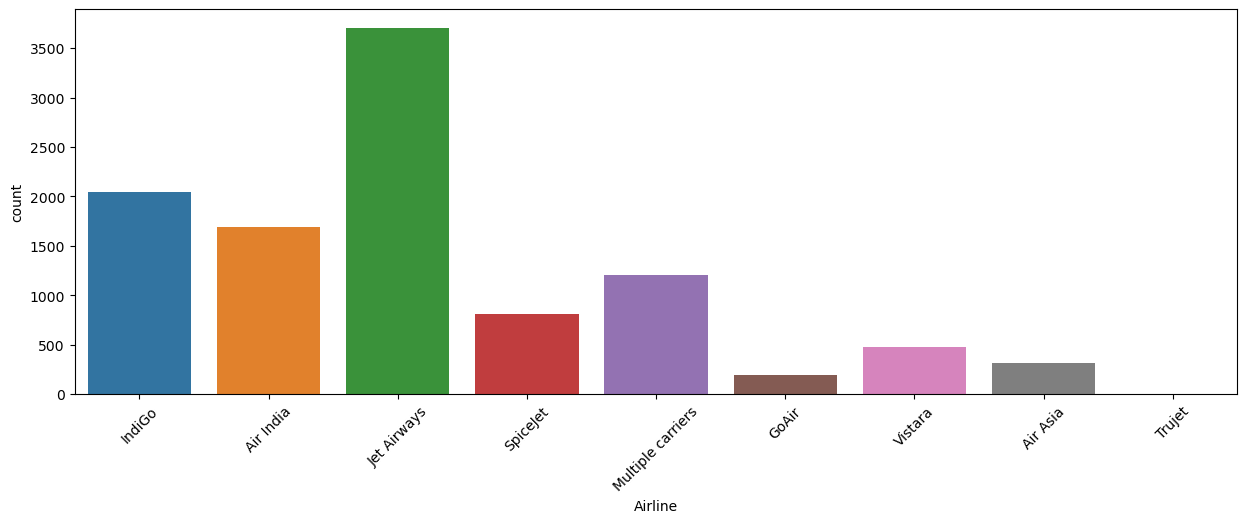

In [28]:
# Airline
# Jet Airways has the maximum flying While Truejest has the least
plt.figure(figsize=(15,5))
sns.countplot(x=df['Airline'])
plt.xticks(rotation=45) 
plt.show() 


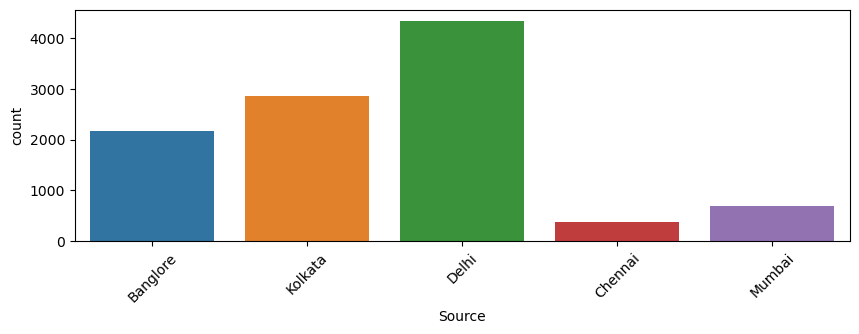

In [29]:
# Source
# Delhi has the maximum take offs chennai has the lest
plt.figure(figsize=(10,3))
sns.countplot(x=df['Source'])
plt.xticks(rotation=45) 
plt.show() 


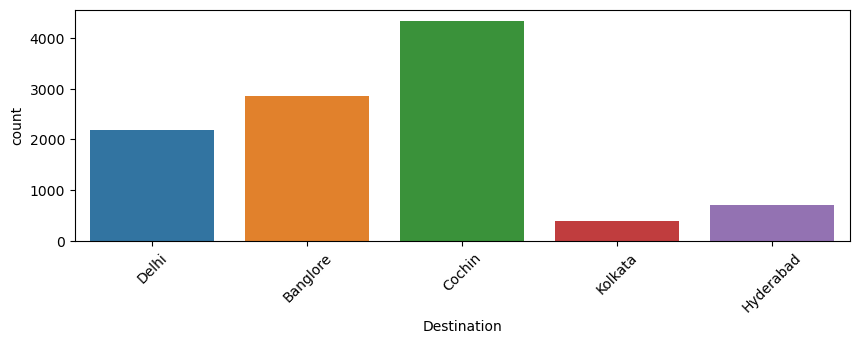

In [30]:
# Destination
# Coachin has the maximum Arrivals
plt.figure(figsize=(10,3))
sns.countplot(x=df['Destination'])
plt.xticks(rotation=45) 
plt.show() 


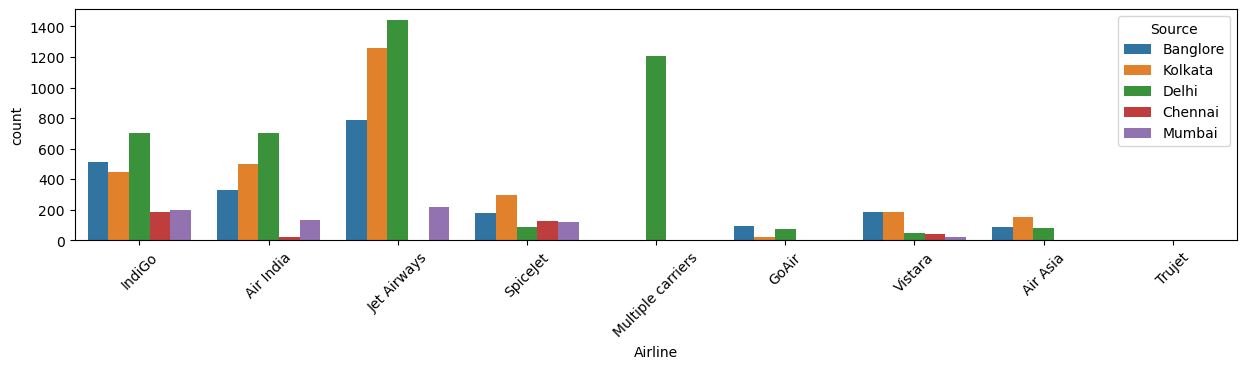

In [31]:
# multivariate Analysis
plt.figure(figsize=(15,3))
sns.countplot(x=df['Airline'],hue=df['Source'])
plt.xticks(rotation=45) 
plt.show() 


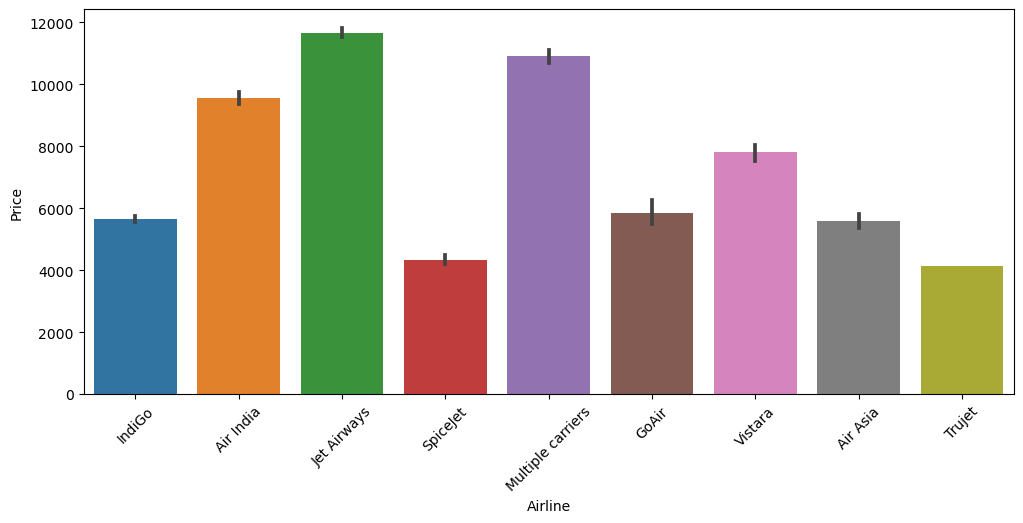

In [32]:

plt.figure(figsize=(12,5))
sns.barplot(x=df['Airline'],y=df['Price'])
plt.xticks(rotation=45) 
plt.show() 


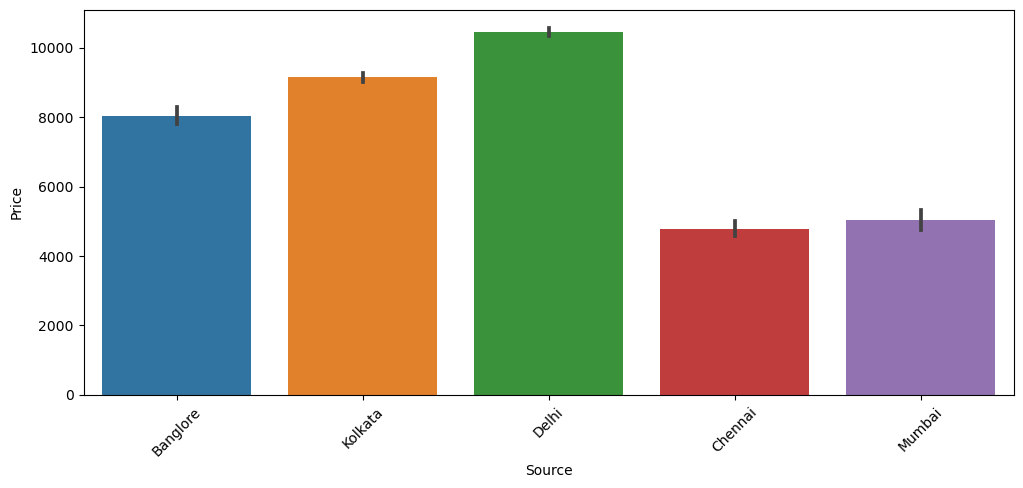

In [33]:

plt.figure(figsize=(12,5))
sns.barplot(x=df['Source'],y=df['Price'])
plt.xticks(rotation=45) 
plt.show() 


<Figure size 1000x1000 with 0 Axes>

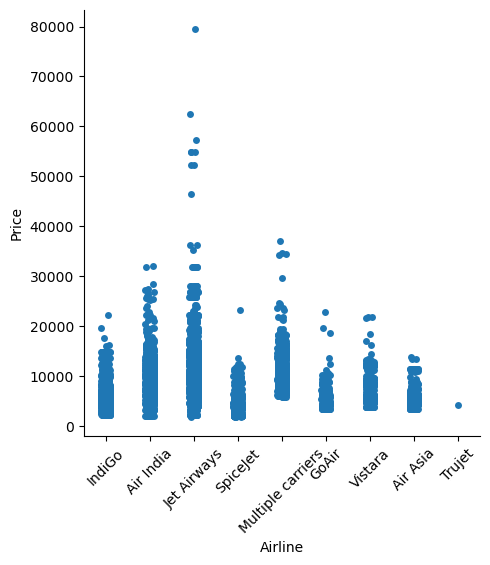

In [34]:
plt.figure(figsize=(10,10))
sns.catplot(x=df['Airline'], y=df['Price'])
plt.xticks(rotation=45) 
plt.show() 


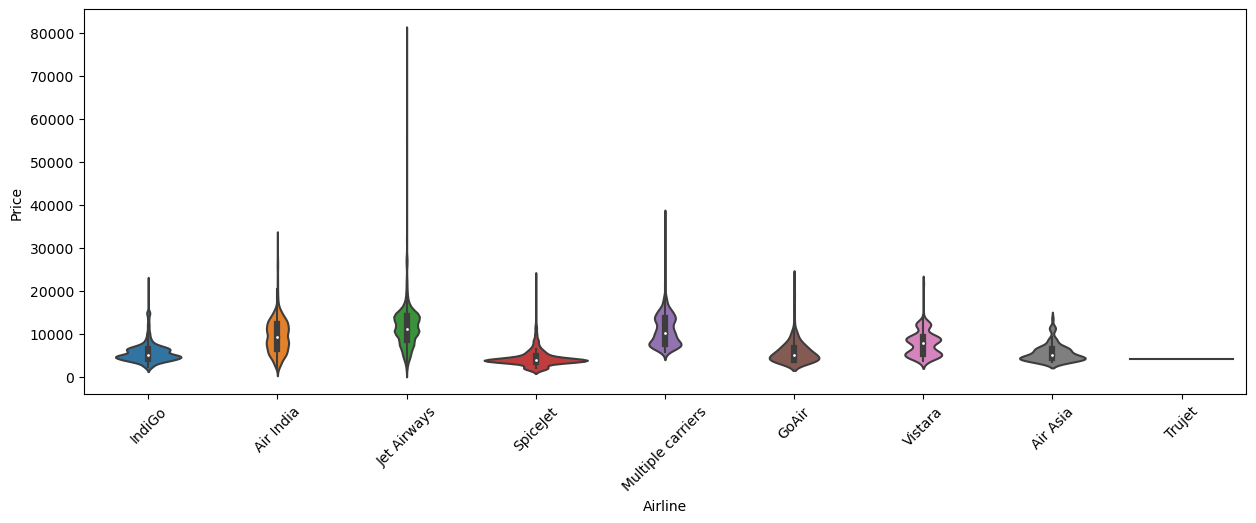

In [35]:

plt.figure(figsize=(15,5))
sns.violinplot(x=df['Airline'],y=df['Price'])
plt.xticks(rotation=45) 
plt.show() 


In [36]:
'''
plt.figure(figsize=(15,5))
sns.swarmplot(x=df['Airline'],y=df['Price'])
plt.xticks(rotation=45) 
plt.show() 

'''

"\nplt.figure(figsize=(15,5))\nsns.swarmplot(x=df['Airline'],y=df['Price'])\nplt.xticks(rotation=45) \nplt.show() \n\n"

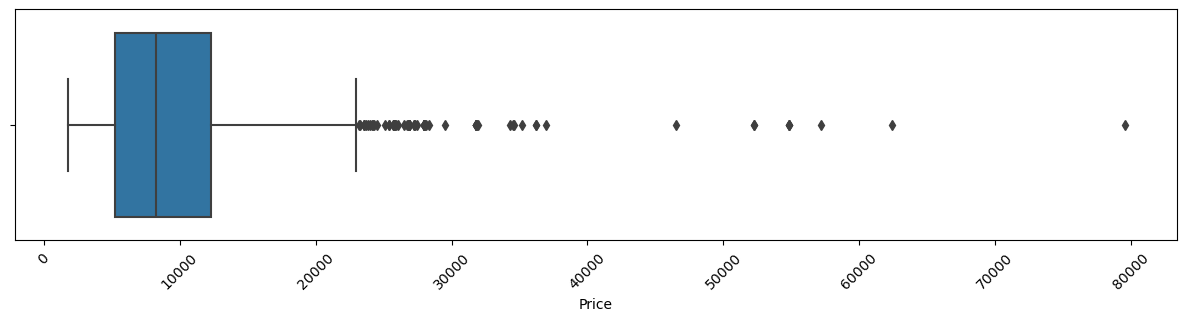

In [37]:
# Outlier Detection
plt.figure(figsize=(15,3))

sns.boxplot(x=df['Price'])
plt.xticks(rotation=45) 
plt.show() 



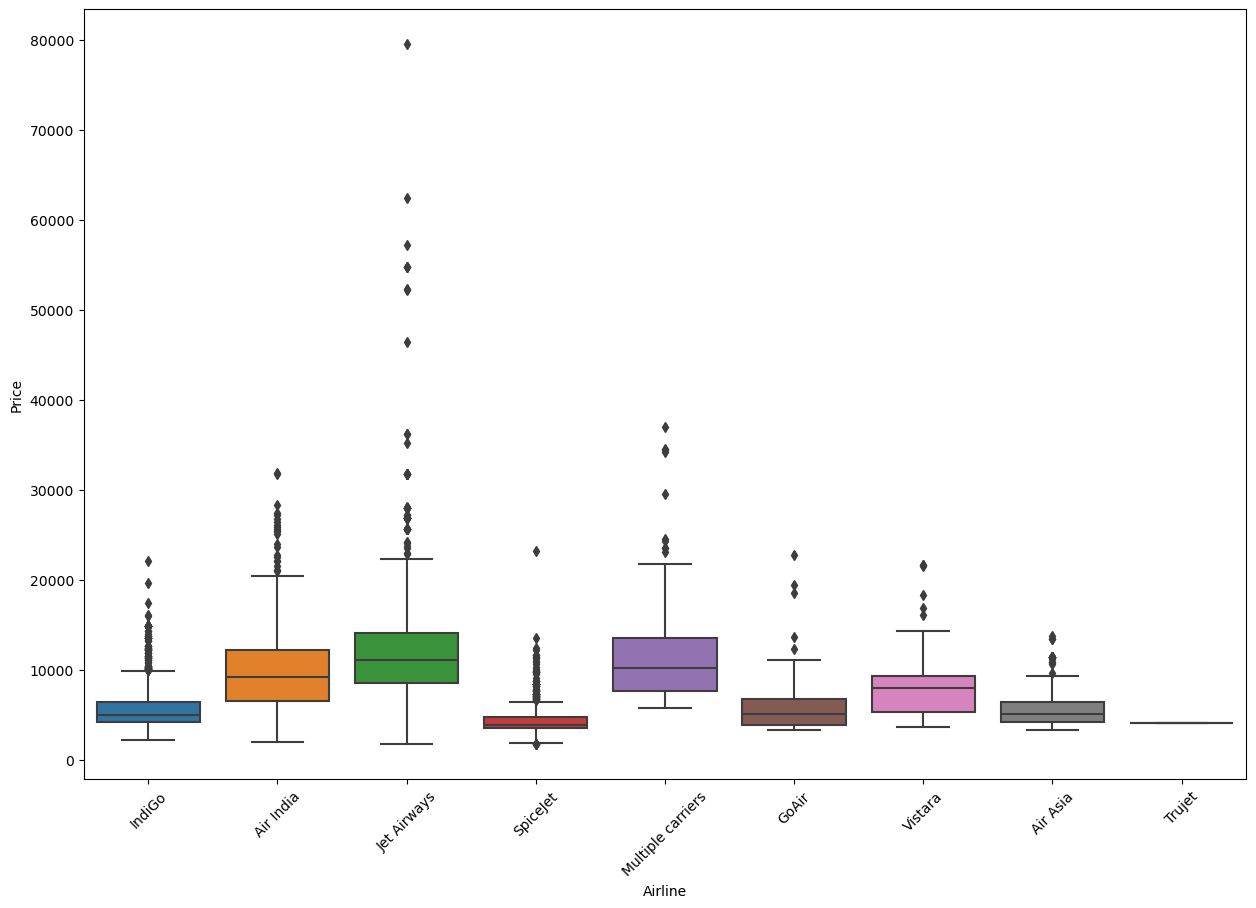

In [38]:
# Outlier Detection

plt.figure(figsize=(15,10))
sns.boxplot(x=df['Airline'],y=df['Price'])
plt.xticks(rotation=45) 
plt.show() 


<Axes: xlabel='Price', ylabel='Density'>

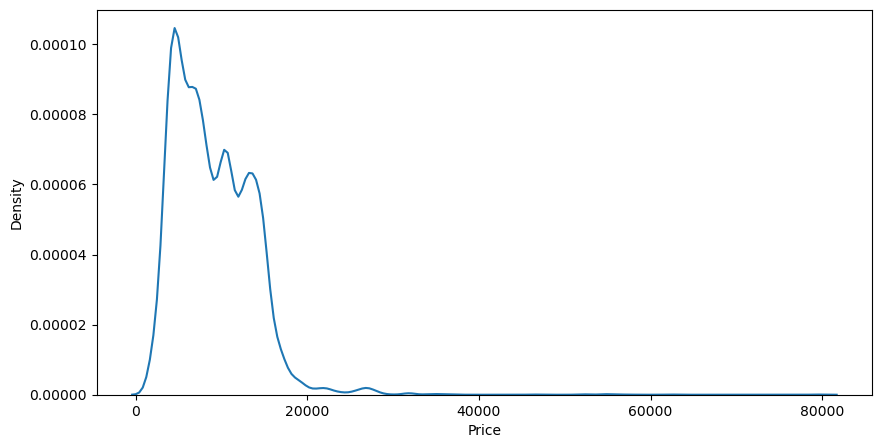

In [39]:

plt.figure(figsize=(10,5))
sns.kdeplot(x=df['Price'])


<Axes: xlabel='Price', ylabel='Count'>

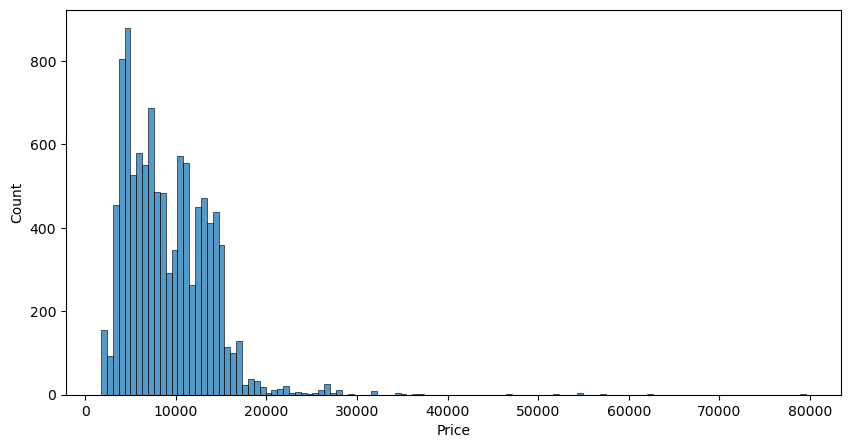

In [40]:
df['Airline']
plt.figure(figsize=(10,5))
sns.histplot(x=df['Price'])


<Axes: xlabel='Price', ylabel='Count'>

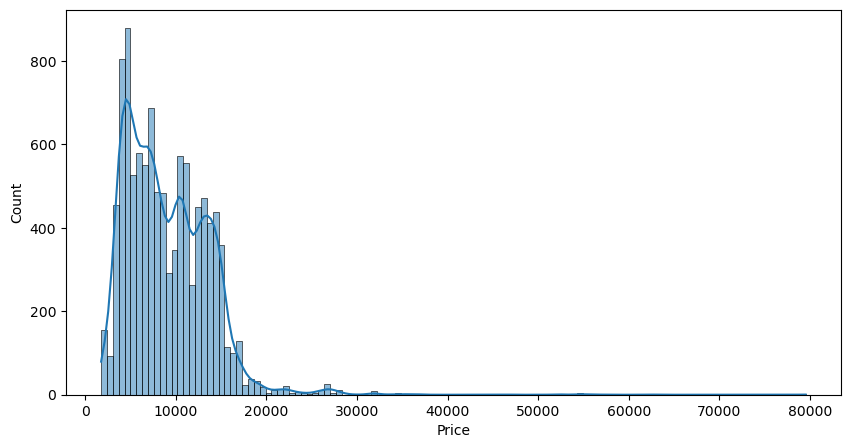

In [41]:
df['Airline']
plt.figure(figsize=(10,5))
sns.histplot(x=df['Price'],kde=True)


In [42]:
df[df['Airline']=='Air India']

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,hoursMinutes
1,Air India,01-05-2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,445
10,Air India,01-06-2019,Delhi,Cochin,DEL ? BLR ? COK,09:45,23:00,13h 15m,1 stop,No info,8907,795
12,Air India,24-06-2019,Chennai,Kolkata,MAA ? CCU,11:40,13:55,2h 15m,non-stop,No info,4667,135
15,Air India,03-03-2019,Delhi,Cochin,DEL ? AMD ? BOM ? COK,16:40,04-03-2023 19:15,26h 35m,2 stops,No info,14011,1595
18,Air India,12-06-2019,Delhi,Cochin,DEL ? CCU ? BOM ? COK,20:15,13-06-2023 19:15,23h,2 stops,No info,13381,1380
...,...,...,...,...,...,...,...,...,...,...,...,...
10669,Air India,12-05-2019,Kolkata,Banglore,CCU ? IXR ? DEL ? BLR,05:50,23:15,17h 25m,2 stops,No info,11411,1045
10670,Air India,06-06-2019,Mumbai,Hyderabad,BOM ? HYD,21:05,22:25,1h 20m,non-stop,No info,3100,80
10674,Air India,09-06-2019,Mumbai,Hyderabad,BOM ? HYD,06:20,07:40,1h 20m,non-stop,No info,3100,80
10678,Air India,27-04-2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145,155


In [43]:
for i in list(enumerate(df['Airline'].unique())):
    print(i[0]+1)
    

1
2
3
4
5
6
7
8
9


In [44]:
df['Airline'].unique()


array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia', 'Trujet'],
      dtype=object)

In [45]:
listOfAirline = list(enumerate(df['Airline'].unique()))
listOfAirline


[(0, 'IndiGo'),
 (1, 'Air India'),
 (2, 'Jet Airways'),
 (3, 'SpiceJet'),
 (4, 'Multiple carriers'),
 (5, 'GoAir'),
 (6, 'Vistara'),
 (7, 'Air Asia'),
 (8, 'Trujet')]

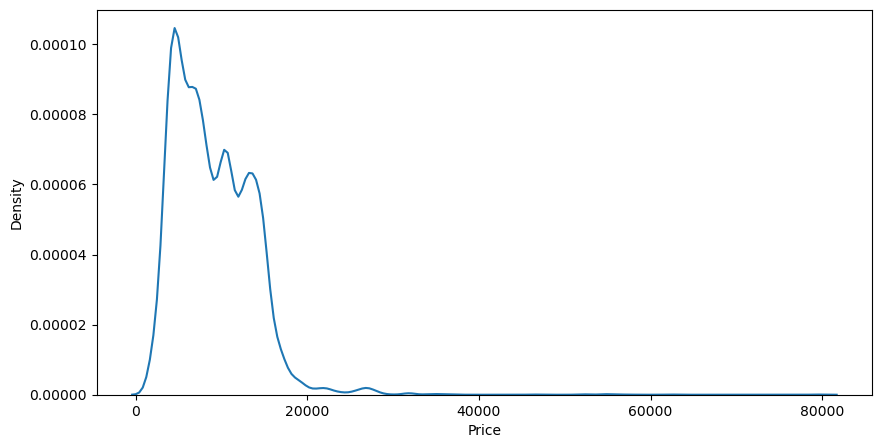

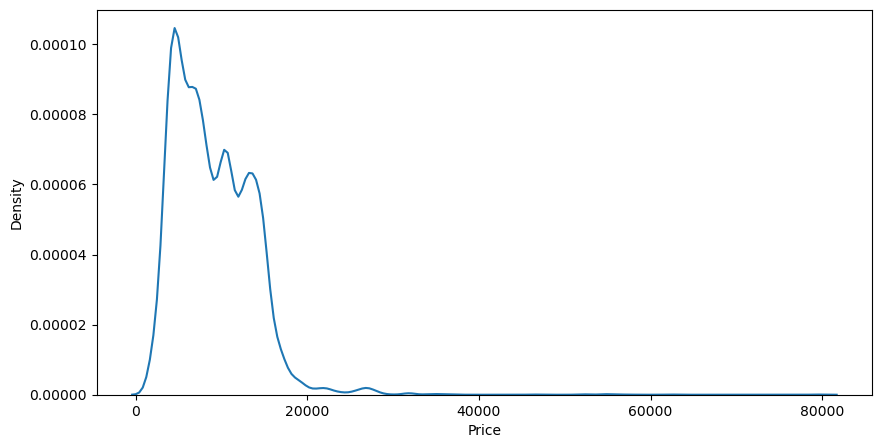

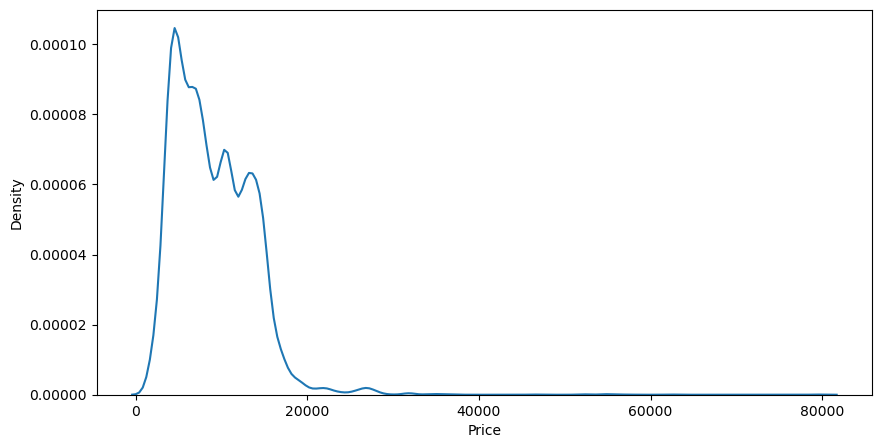

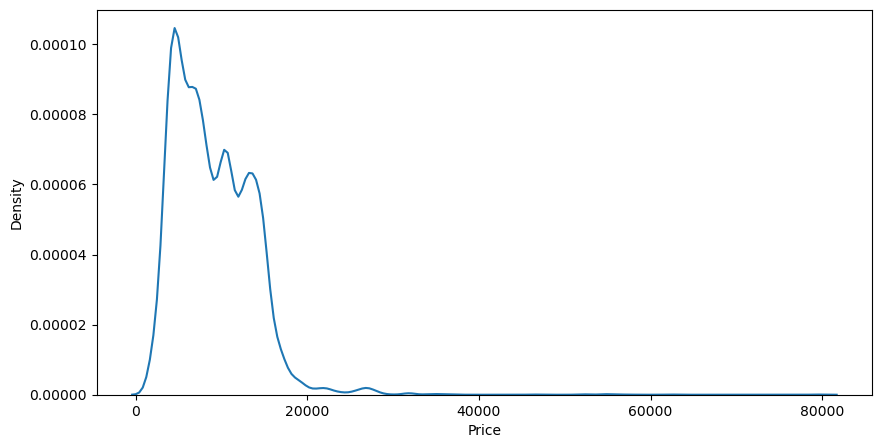

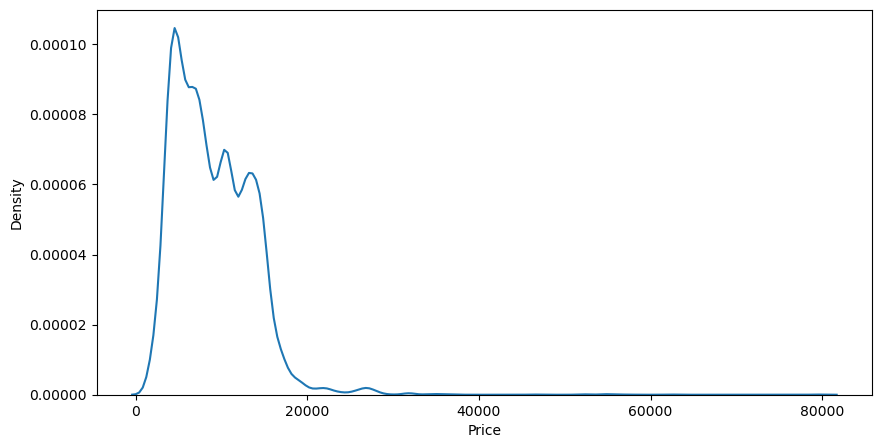

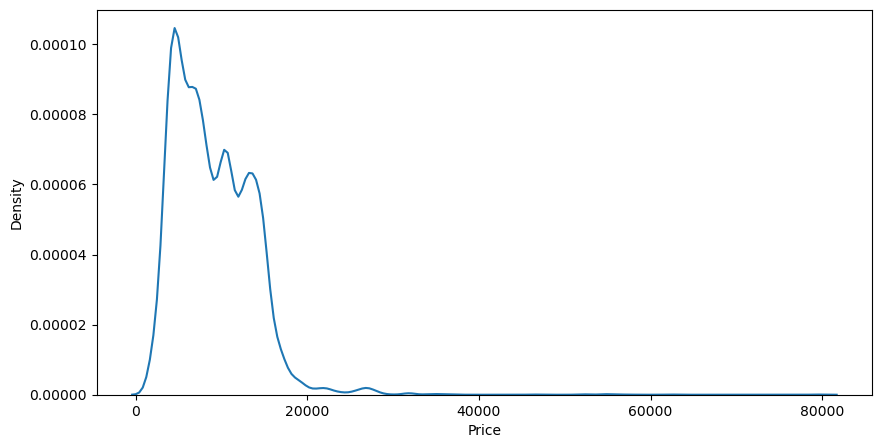

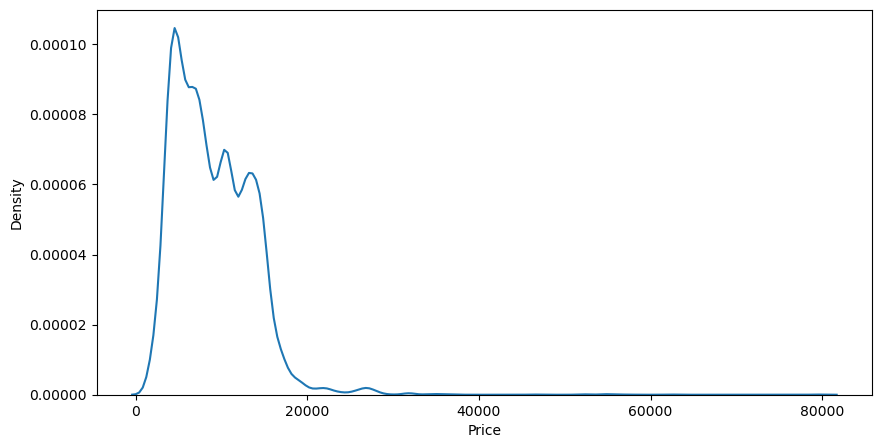

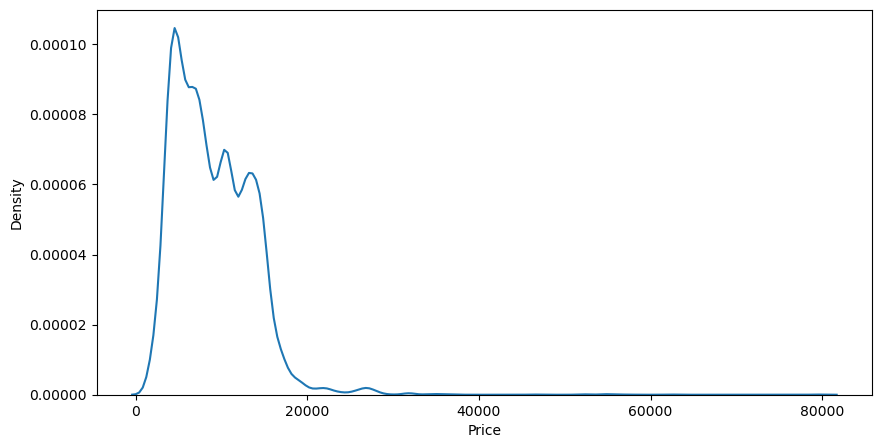

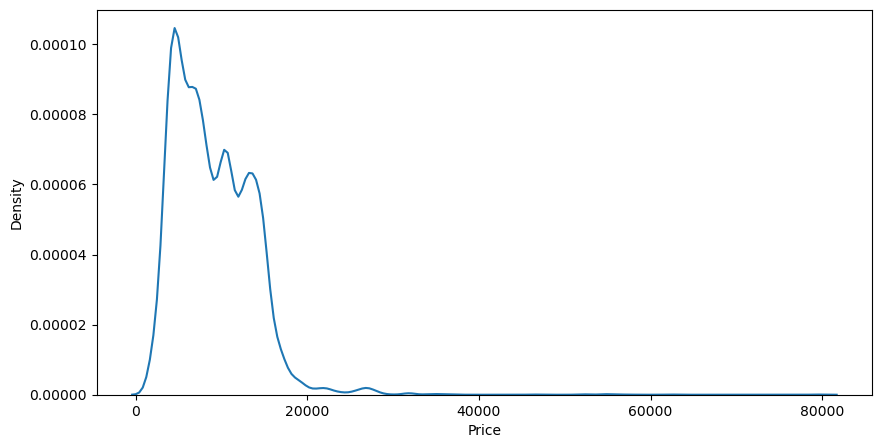

In [46]:
for i in listOfAirline:
    plt.figure(figsize=(10,5))
    sns.kdeplot(x=df['Price'])

    


In [47]:
df[df['Airline']=='Jet Airways']



,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,hoursMinutes
2,Jet Airways,09-06-2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,10-06-2023 04:25,19h,2 stops,No info,13882,1140
6,Jet Airways,12-03-2019,Banglore,Delhi,BLR ? BOM ? DEL,18:55,13-03-2023 10:25,15h 30m,1 stop,In-flight meal not included,11087,930
7,Jet Airways,01-03-2019,Banglore,Delhi,BLR ? BOM ? DEL,08:00,02-03-2023 05:05,21h 5m,1 stop,No info,22270,1265
8,Jet Airways,12-03-2019,Banglore,Delhi,BLR ? BOM ? DEL,08:55,13-03-2023 10:25,25h 30m,1 stop,In-flight meal not included,11087,1530
13,Jet Airways,09-05-2019,Kolkata,Banglore,CCU ? BOM ? BLR,21:10,10-05-2023 09:20,12h 10m,1 stop,In-flight meal not included,9663,730
...,...,...,...,...,...,...,...,...,...,...,...,...
10665,Jet Airways,12-06-2019,Delhi,Cochin,DEL ? BOM ? COK,18:15,13-06-2023 19:00,24h 45m,1 stop,In-flight meal not included,10262,1485
10666,Jet Airways,12-03-2019,Banglore,Delhi,BLR ? BOM ? DEL,22:55,13-03-2023 20:20,21h 25m,1 stop,In-flight meal not included,11087,1285
10667,Jet Airways,09-05-2019,Delhi,Cochin,DEL ? JDH ? BOM ? COK,11:40,19:00,7h 20m,2 stops,No info,21219,440
10673,Jet Airways,12-03-2019,Banglore,Delhi,BLR ? BOM ? DEL,20:35,13-03-2023 21:20,24h 45m,1 stop,In-flight meal not included,11087,1485


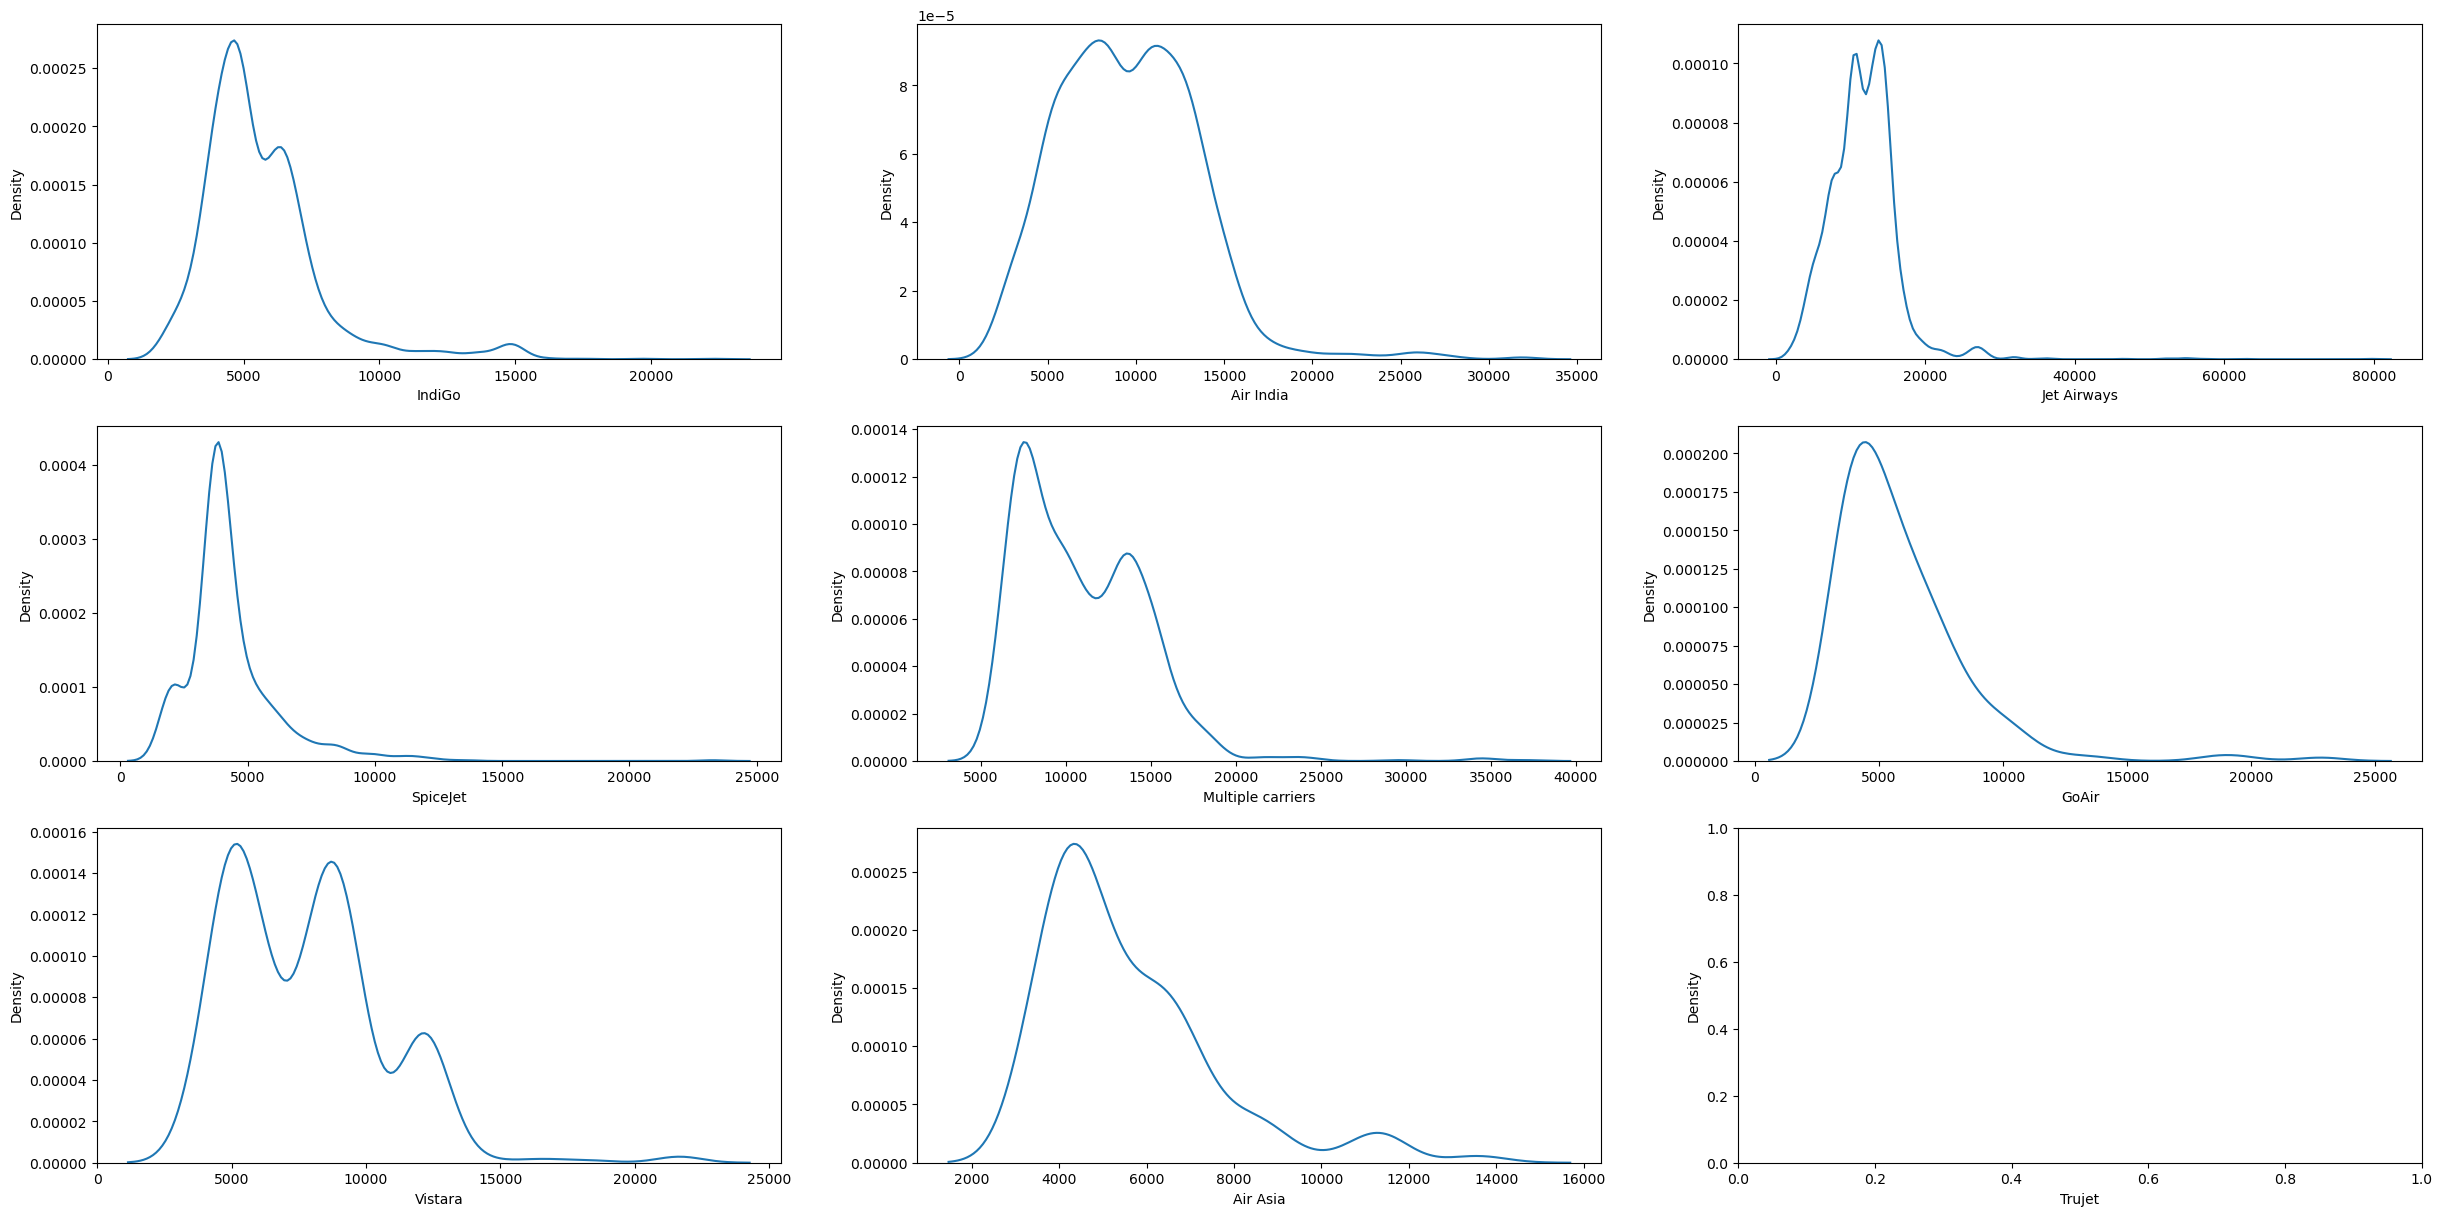

In [48]:
'''[(0, 'IndiGo'),
 (1, 'Air India'),
 (2, 'Jet Airways'),
 (3, 'SpiceJet'),
 (4, 'Multiple carriers'),
 (5, 'GoAir'),
 (6, 'Vistara'),
 (7, 'Air Asia'),
 (8, 'Trujet')]'''



plt.figure(figsize=(30,20))

for i in listOfAirline:
    plt.subplot(4,3,i[0]+1)

    indi = df[df['Airline']==i[1]]
    sns.kdeplot(x=indi['Price'])
    plt.xlabel(i[1]) 


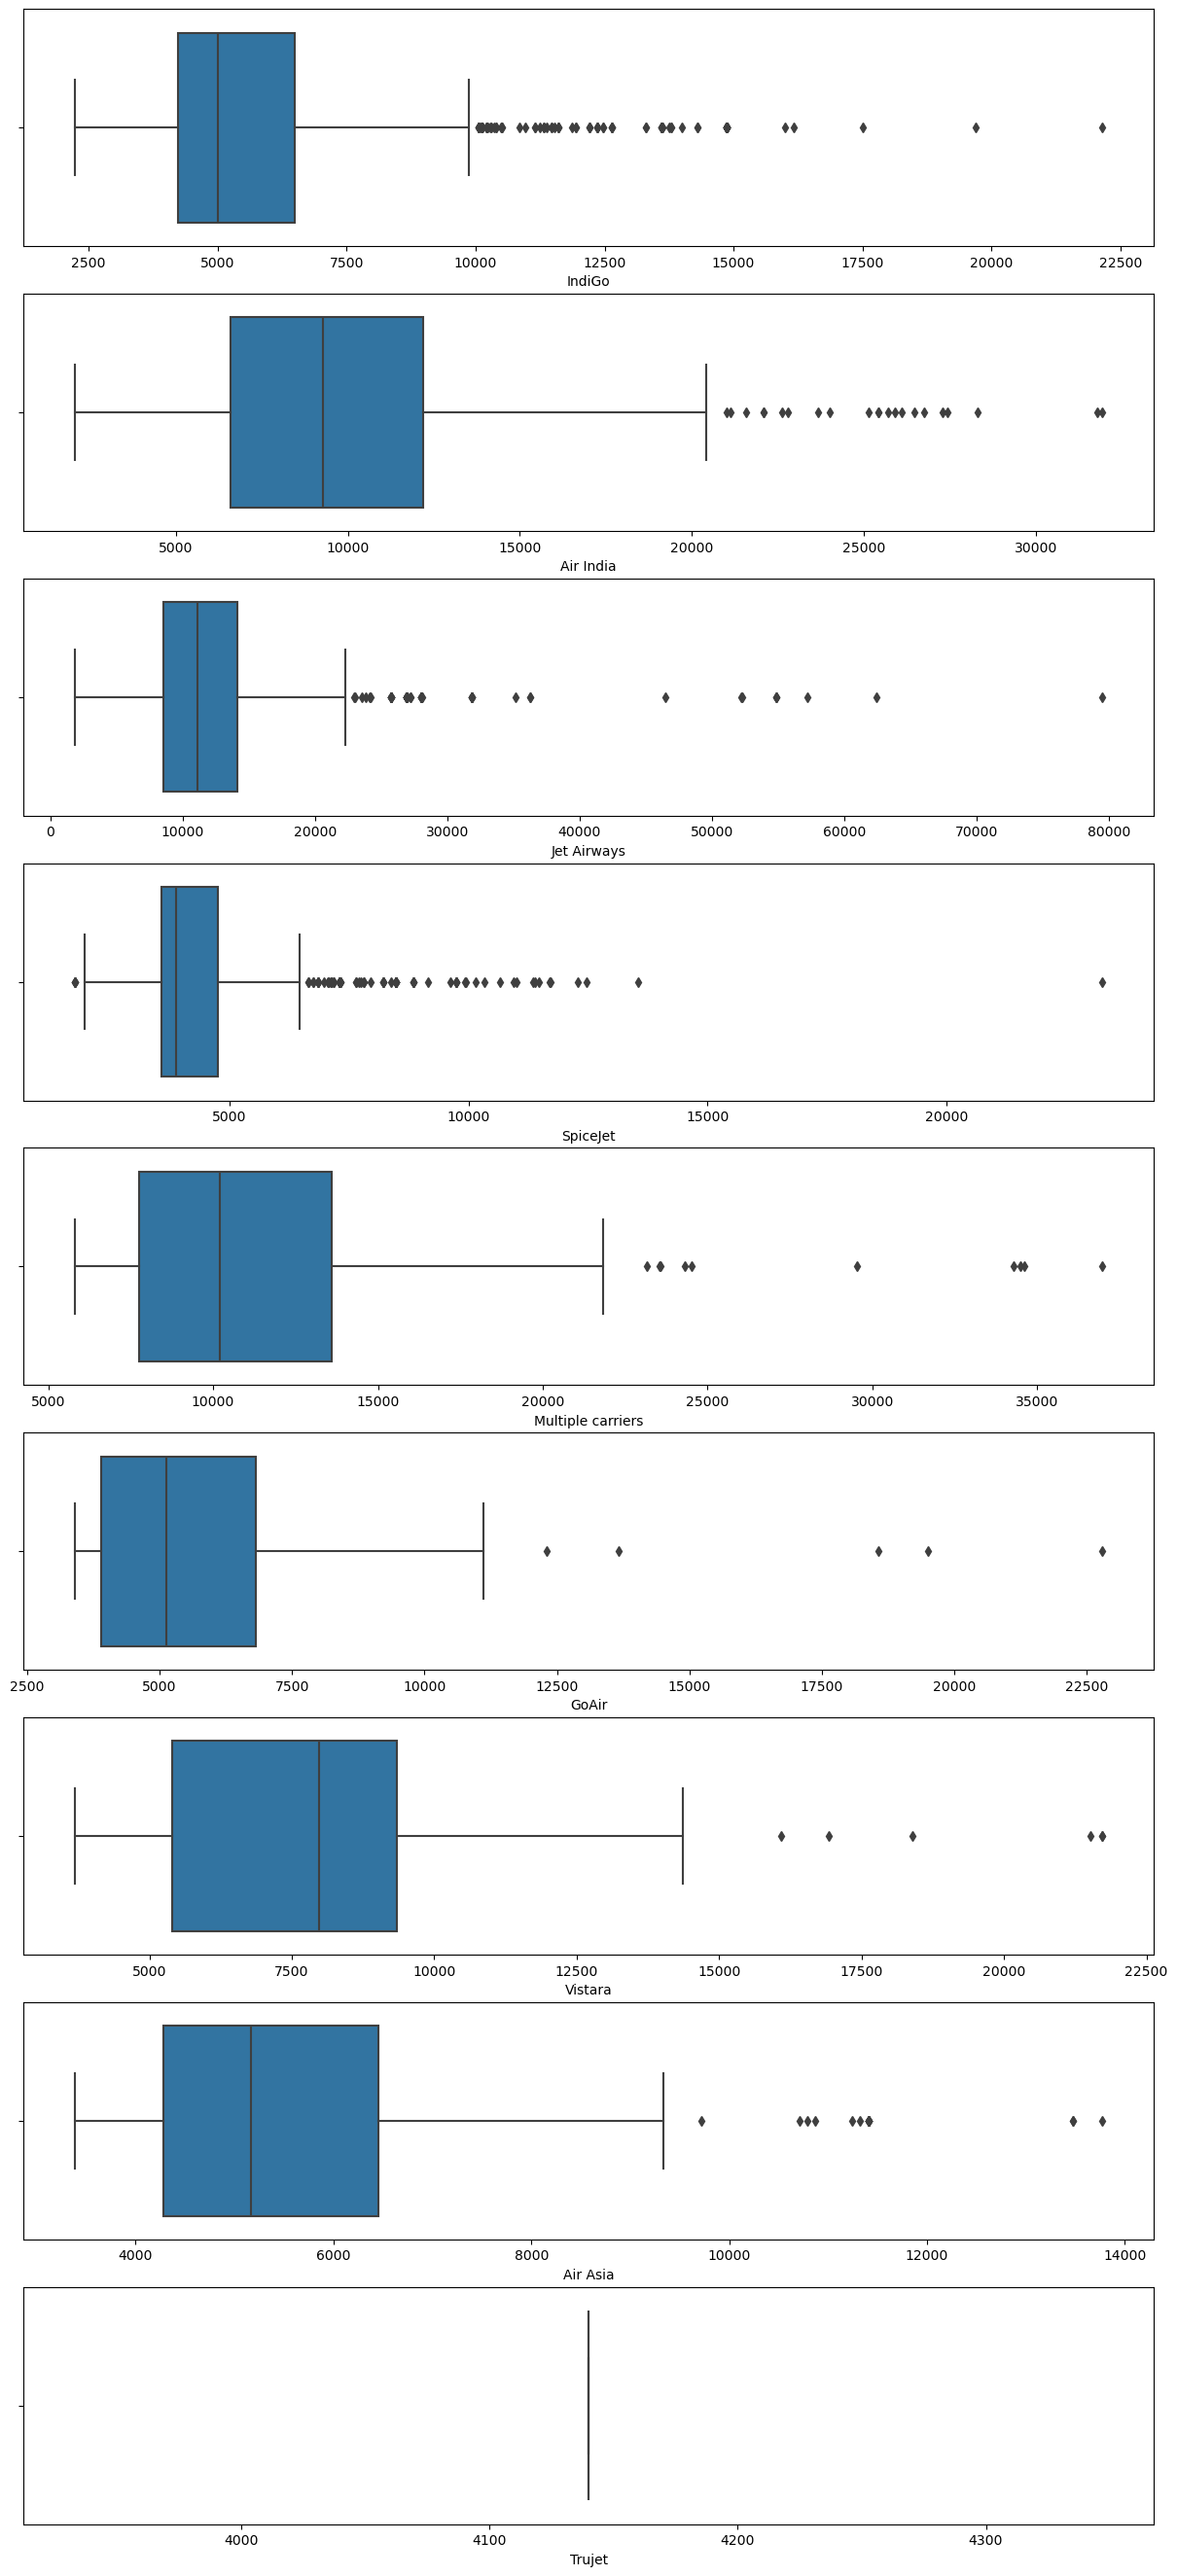

In [49]:
plt.figure(figsize=(15,45))

for i in list(enumerate(df['Airline'].unique())):
    plt.subplot(12,1,i[0]+1)
    indi = df[df['Airline']==df['Airline'].unique()[i[0]]]
    sns.boxplot(x=indi['Price'])
    plt.xlabel(i[1]) 



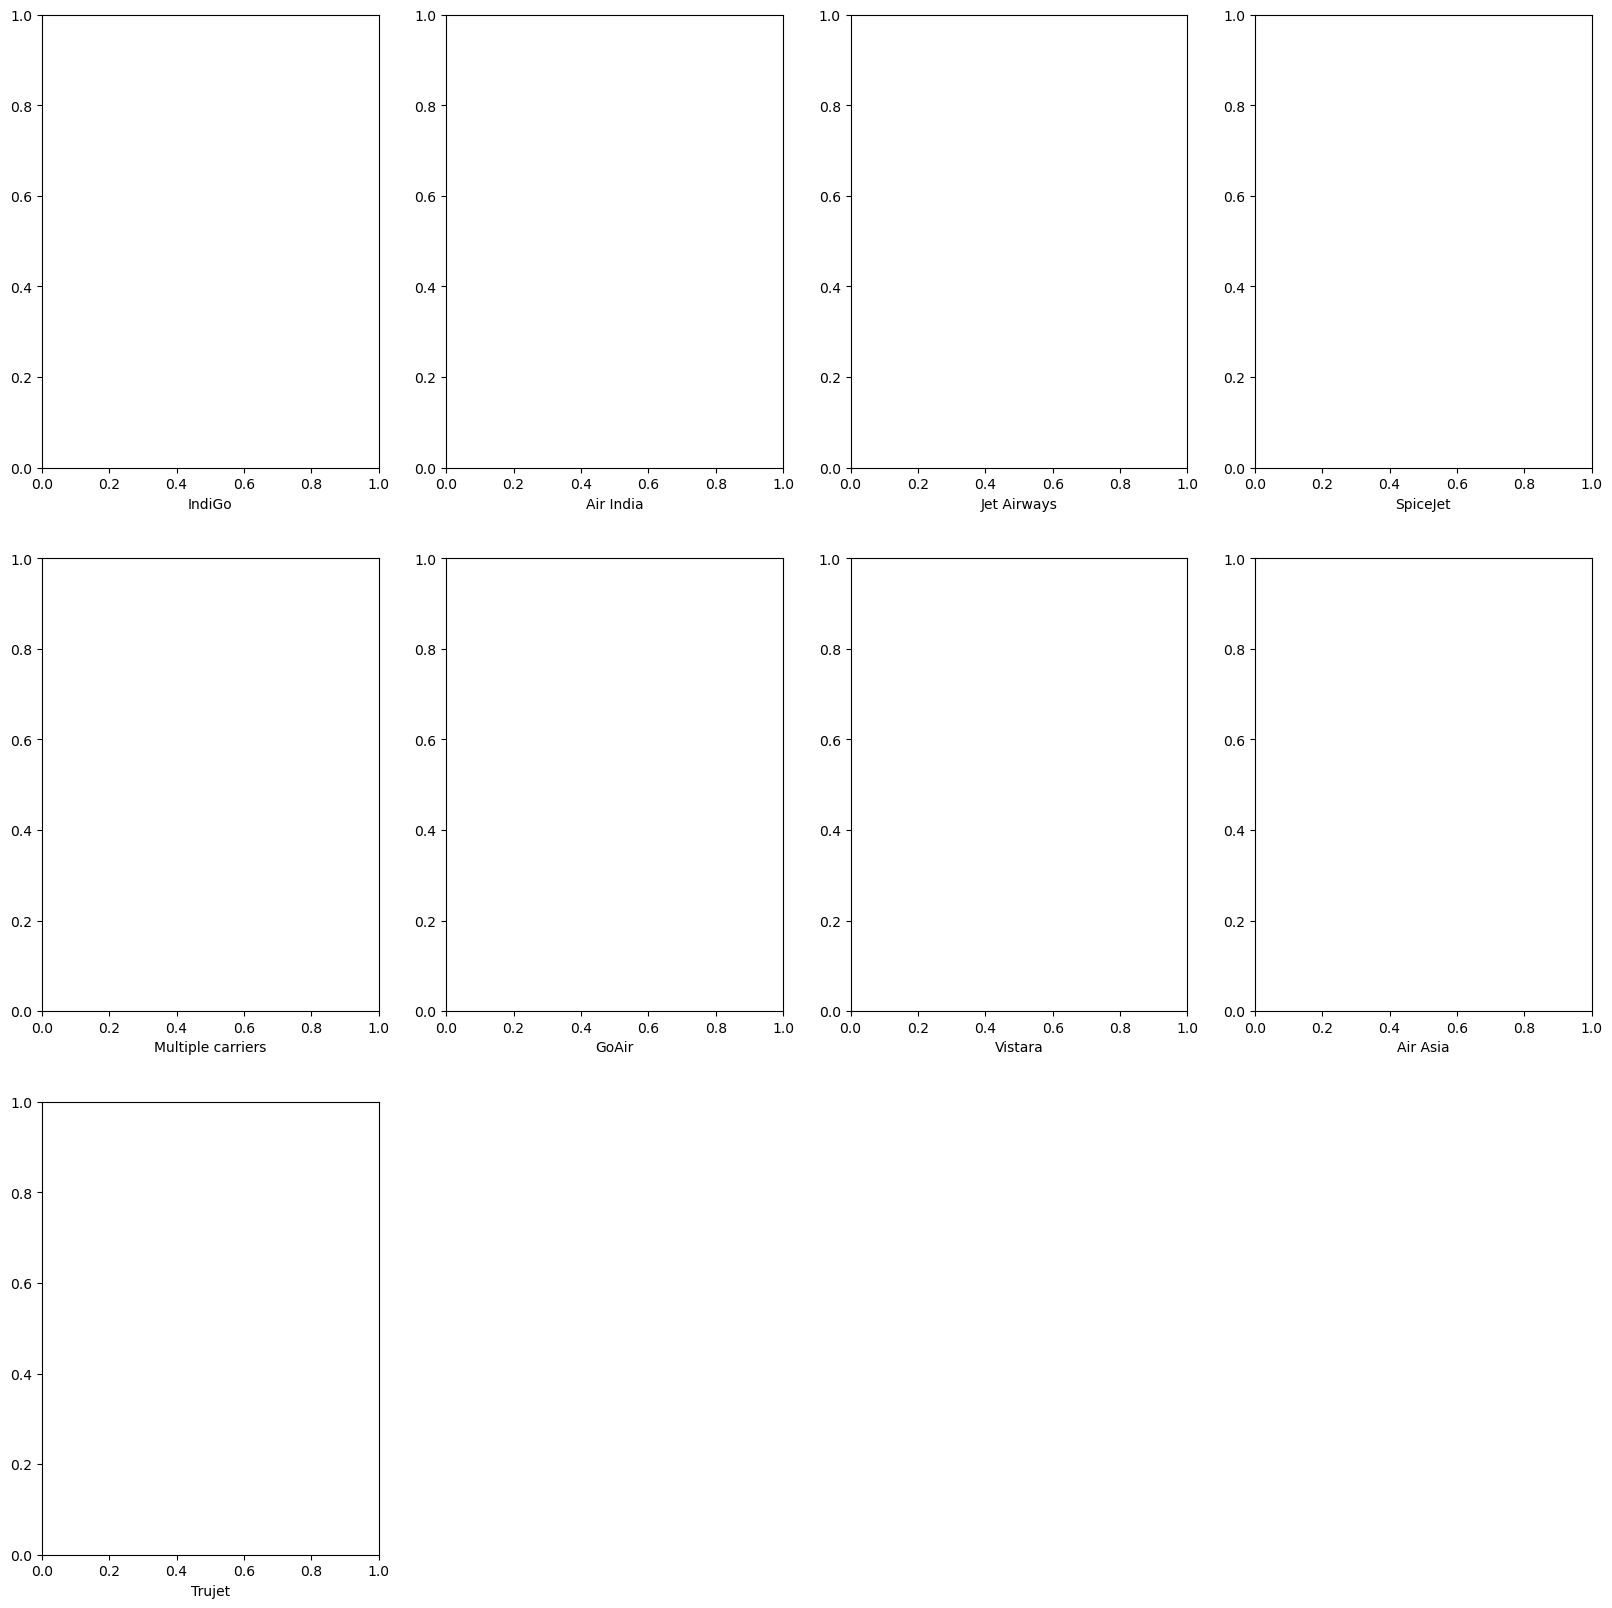

In [50]:
plt.figure(figsize=(20,20))

for i in list(enumerate(df['Airline'].unique())):
    plt.subplot(3,4,i[0]+1)
    indi = df[df['Airline']==i[0]]
    sns.kdeplot(x=indi['Price'])
    plt.xlabel(i[1]) 



In [51]:

df['Date_of_Journey']

# Day
# Month
# Year


0        24-03-2019
1        01-05-2019
2        09-06-2019
3        12-05-2019
4        01-03-2019
            ...    
10677    09-04-2019
10678    27-04-2019
10679    27-04-2019
10680    01-03-2019
10681    09-05-2019
Name: Date_of_Journey, Length: 10462, dtype: object

In [52]:
df['Day'] = pd.to_datetime(df["Date_of_Journey"],format="%d-%m-%Y").dt.day

df['Day']


0        24
1         1
2         9
3        12
4         1
         ..
10677     9
10678    27
10679    27
10680     1
10681     9
Name: Day, Length: 10462, dtype: int64

In [53]:
df['Month'] = pd.to_datetime(df['Date_of_Journey'],format="%d-%m-%Y").dt.month
df['Month']


0        3
1        5
2        6
3        5
4        3
        ..
10677    4
10678    4
10679    4
10680    3
10681    5
Name: Month, Length: 10462, dtype: int64

In [54]:
df['Year'] = pd.to_datetime(df['Date_of_Journey'],format="%d-%m-%Y").dt.year
df['Year']


0        2019
1        2019
2        2019
3        2019
4        2019
         ... 
10677    2019
10678    2019
10679    2019
10680    2019
10681    2019
Name: Year, Length: 10462, dtype: int64

In [55]:
df


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,hoursMinutes,Day,Month,Year
0,IndiGo,24-03-2019,Banglore,Delhi,BLR ? DEL,22:20,22-03-2023 01:10,2h 50m,non-stop,No info,3897,170,24,3,2019
1,Air India,01-05-2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,445,1,5,2019
2,Jet Airways,09-06-2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,10-06-2023 04:25,19h,2 stops,No info,13882,1140,9,6,2019
3,IndiGo,12-05-2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,325,12,5,2019
4,IndiGo,01-03-2019,Banglore,Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,285,1,3,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,09-04-2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107,150,9,4,2019
10678,Air India,27-04-2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145,155,27,4,2019
10679,Jet Airways,27-04-2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229,180,27,4,2019
10680,Vistara,01-03-2019,Banglore,Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648,160,1,3,2019


In [56]:

columName = 'Dept_Hour'
columName = columName.split("_")[0]
df[columName+"_Hour"] = pd.to_datetime(df['Dep_Time']).dt.hour
df[columName+"_Hour"]

df


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,hoursMinutes,Day,Month,Year,Dept_Hour
0,IndiGo,24-03-2019,Banglore,Delhi,BLR ? DEL,22:20,22-03-2023 01:10,2h 50m,non-stop,No info,3897,170,24,3,2019,22
1,Air India,01-05-2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,445,1,5,2019,5
2,Jet Airways,09-06-2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,10-06-2023 04:25,19h,2 stops,No info,13882,1140,9,6,2019,9
3,IndiGo,12-05-2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,325,12,5,2019,18
4,IndiGo,01-03-2019,Banglore,Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,285,1,3,2019,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,09-04-2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107,150,9,4,2019,19
10678,Air India,27-04-2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145,155,27,4,2019,20
10679,Jet Airways,27-04-2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229,180,27,4,2019,8
10680,Vistara,01-03-2019,Banglore,Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648,160,1,3,2019,11


In [57]:
# Arrival time is when the plane pulls up to the gate.
# Similar to Date_of_Journey we can extract values from Arrival_Time



In [58]:


df['Dept_Hour'] = pd.to_datetime(df['Dep_Time']).dt.minute
df


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,hoursMinutes,Day,Month,Year,Dept_Hour
0,IndiGo,24-03-2019,Banglore,Delhi,BLR ? DEL,22:20,22-03-2023 01:10,2h 50m,non-stop,No info,3897,170,24,3,2019,20
1,Air India,01-05-2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,445,1,5,2019,50
2,Jet Airways,09-06-2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,10-06-2023 04:25,19h,2 stops,No info,13882,1140,9,6,2019,25
3,IndiGo,12-05-2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,325,12,5,2019,5
4,IndiGo,01-03-2019,Banglore,Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,285,1,3,2019,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,09-04-2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107,150,9,4,2019,55
10678,Air India,27-04-2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145,155,27,4,2019,45
10679,Jet Airways,27-04-2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229,180,27,4,2019,20
10680,Vistara,01-03-2019,Banglore,Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648,160,1,3,2019,30


In [59]:
df['Dept_Minute']=pd.to_datetime(df['Dep_Time']).dt.minute
df



,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,hoursMinutes,Day,Month,Year,Dept_Hour,Dept_Minute
0,IndiGo,24-03-2019,Banglore,Delhi,BLR ? DEL,22:20,22-03-2023 01:10,2h 50m,non-stop,No info,3897,170,24,3,2019,20,20
1,Air India,01-05-2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,445,1,5,2019,50,50
2,Jet Airways,09-06-2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,10-06-2023 04:25,19h,2 stops,No info,13882,1140,9,6,2019,25,25
3,IndiGo,12-05-2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,325,12,5,2019,5,5
4,IndiGo,01-03-2019,Banglore,Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,285,1,3,2019,50,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,09-04-2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107,150,9,4,2019,55,55
10678,Air India,27-04-2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145,155,27,4,2019,45,45
10679,Jet Airways,27-04-2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229,180,27,4,2019,20,20
10680,Vistara,01-03-2019,Banglore,Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648,160,1,3,2019,30,30


In [60]:
df['Arr_Hour'] = pd.to_datetime(df['Arrival_Time']).dt.hour
df


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,hoursMinutes,Day,Month,Year,Dept_Hour,Dept_Minute,Arr_Hour
0,IndiGo,24-03-2019,Banglore,Delhi,BLR ? DEL,22:20,22-03-2023 01:10,2h 50m,non-stop,No info,3897,170,24,3,2019,20,20,1
1,Air India,01-05-2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,445,1,5,2019,50,50,13
2,Jet Airways,09-06-2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,10-06-2023 04:25,19h,2 stops,No info,13882,1140,9,6,2019,25,25,4
3,IndiGo,12-05-2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,325,12,5,2019,5,5,23
4,IndiGo,01-03-2019,Banglore,Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,285,1,3,2019,50,50,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,09-04-2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107,150,9,4,2019,55,55,22
10678,Air India,27-04-2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145,155,27,4,2019,45,45,23
10679,Jet Airways,27-04-2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229,180,27,4,2019,20,20,11
10680,Vistara,01-03-2019,Banglore,Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648,160,1,3,2019,30,30,14


In [61]:
df['Arr_Minute']=pd.to_datetime(df['Arrival_Time']).dt.minute

df.head(5)


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,hoursMinutes,Day,Month,Year,Dept_Hour,Dept_Minute,Arr_Hour,Arr_Minute
0,IndiGo,24-03-2019,Banglore,Delhi,BLR ? DEL,22:20,22-03-2023 01:10,2h 50m,non-stop,No info,3897,170,24,3,2019,20,20,1,10
1,Air India,01-05-2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,445,1,5,2019,50,50,13,15
2,Jet Airways,09-06-2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,10-06-2023 04:25,19h,2 stops,No info,13882,1140,9,6,2019,25,25,4,25
3,IndiGo,12-05-2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,325,12,5,2019,5,5,23,30
4,IndiGo,01-03-2019,Banglore,Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,285,1,3,2019,50,50,21,35


In [62]:
# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time



In [63]:
df['Duration'].unique()


array(['2h 50m', '7h 25m', '19h', '5h 25m', '4h 45m', '2h 25m', '15h 30m',
       '21h 5m', '25h 30m', '7h 50m', '13h 15m', '2h 35m', '2h 15m',
       '12h 10m', '26h 35m', '4h 30m', '22h 35m', '23h', '20h 35m',
       '5h 10m', '15h 20m', '2h 55m', '13h 20m', '15h 10m', '5h 45m',
       '5h 55m', '13h 25m', '22h', '5h 30m', '10h 25m', '5h 15m',
       '2h 30m', '6h 15m', '11h 55m', '11h 5m', '8h 30m', '22h 5m',
       '2h 45m', '12h', '16h 5m', '19h 55m', '3h 15m', '25h 20m', '3h',
       '16h 15m', '15h 5m', '6h 30m', '25h 5m', '12h 25m', '27h 20m',
       '10h 15m', '10h 30m', '1h 30m', '1h 25m', '26h 30m', '7h 20m',
       '13h 30m', '5h', '19h 5m', '14h 50m', '2h 40m', '22h 10m',
       '9h 35m', '10h', '21h 20m', '18h 45m', '12h 20m', '18h', '9h 15m',
       '17h 30m', '16h 35m', '12h 15m', '7h 30m', '24h', '8h 55m',
       '7h 10m', '14h 30m', '30h 20m', '15h', '12h 45m', '10h 10m',
       '15h 25m', '14h 5m', '20h 15m', '23h 10m', '18h 10m', '16h',
       '2h 20m', '8h', '16h 5

In [64]:
values = "50m"
values = values.split(" ")
values


['50m']

In [65]:
df = df.drop(['Date_of_Journey','Dep_Time','Arrival_Time','Duration'],axis=1)

df



,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,hoursMinutes,Day,Month,Year,Dept_Hour,Dept_Minute,Arr_Hour,Arr_Minute
0,IndiGo,Banglore,Delhi,BLR ? DEL,non-stop,No info,3897,170,24,3,2019,20,20,1,10
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2 stops,No info,7662,445,1,5,2019,50,50,13,15
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2 stops,No info,13882,1140,9,6,2019,25,25,4,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,1 stop,No info,6218,325,12,5,2019,5,5,23,30
4,IndiGo,Banglore,Delhi,BLR ? NAG ? DEL,1 stop,No info,13302,285,1,3,2019,50,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,Kolkata,Banglore,CCU ? BLR,non-stop,No info,4107,150,9,4,2019,55,55,22,25
10678,Air India,Kolkata,Banglore,CCU ? BLR,non-stop,No info,4145,155,27,4,2019,45,45,23,20
10679,Jet Airways,Banglore,Delhi,BLR ? DEL,non-stop,No info,7229,180,27,4,2019,20,20,11,20
10680,Vistara,Banglore,Delhi,BLR ? DEL,non-stop,No info,12648,160,1,3,2019,30,30,14,10


In [66]:
df = df.drop(["Route","Additional_Info"], axis = 1)
df


,Airline,Source,Destination,Total_Stops,Price,hoursMinutes,Day,Month,Year,Dept_Hour,Dept_Minute,Arr_Hour,Arr_Minute
0,IndiGo,Banglore,Delhi,non-stop,3897,170,24,3,2019,20,20,1,10
1,Air India,Kolkata,Banglore,2 stops,7662,445,1,5,2019,50,50,13,15
2,Jet Airways,Delhi,Cochin,2 stops,13882,1140,9,6,2019,25,25,4,25
3,IndiGo,Kolkata,Banglore,1 stop,6218,325,12,5,2019,5,5,23,30
4,IndiGo,Banglore,Delhi,1 stop,13302,285,1,3,2019,50,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,Kolkata,Banglore,non-stop,4107,150,9,4,2019,55,55,22,25
10678,Air India,Kolkata,Banglore,non-stop,4145,155,27,4,2019,45,45,23,20
10679,Jet Airways,Banglore,Delhi,non-stop,7229,180,27,4,2019,20,20,11,20
10680,Vistara,Banglore,Delhi,non-stop,12648,160,1,3,2019,30,30,14,10


In [67]:
df = df[['Airline', 'Source', 'Destination', 'Total_Stops', 'Day','Month', 'Year',
                         'Dept_Hour', 'Dept_Minute', 'Arr_Hour', 'Arr_Minute','hoursMinutes','Price',]]

df


,Airline,Source,Destination,Total_Stops,Day,Month,Year,Dept_Hour,Dept_Minute,Arr_Hour,Arr_Minute,hoursMinutes,Price
0,IndiGo,Banglore,Delhi,non-stop,24,3,2019,20,20,1,10,170,3897
1,Air India,Kolkata,Banglore,2 stops,1,5,2019,50,50,13,15,445,7662
2,Jet Airways,Delhi,Cochin,2 stops,9,6,2019,25,25,4,25,1140,13882
3,IndiGo,Kolkata,Banglore,1 stop,12,5,2019,5,5,23,30,325,6218
4,IndiGo,Banglore,Delhi,1 stop,1,3,2019,50,50,21,35,285,13302
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,Kolkata,Banglore,non-stop,9,4,2019,55,55,22,25,150,4107
10678,Air India,Kolkata,Banglore,non-stop,27,4,2019,45,45,23,20,155,4145
10679,Jet Airways,Banglore,Delhi,non-stop,27,4,2019,20,20,11,20,180,7229
10680,Vistara,Banglore,Delhi,non-stop,1,3,2019,30,30,14,10,160,12648


In [68]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [69]:
df.columns
data_train = df[['Airline', 'Source', 'Destination', 'Total_Stops', 'Day','Month', 'Year',
                         'Dept_Hour', 'Dept_Minute', 'Arr_Hour', 'Arr_Minute','hoursMinutes','Price',]]

data_train

,Airline,Source,Destination,Total_Stops,Day,Month,Year,Dept_Hour,Dept_Minute,Arr_Hour,Arr_Minute,hoursMinutes,Price
0,IndiGo,Banglore,Delhi,non-stop,24,3,2019,20,20,1,10,170,3897
1,Air India,Kolkata,Banglore,2 stops,1,5,2019,50,50,13,15,445,7662
2,Jet Airways,Delhi,Cochin,2 stops,9,6,2019,25,25,4,25,1140,13882
3,IndiGo,Kolkata,Banglore,1 stop,12,5,2019,5,5,23,30,325,6218
4,IndiGo,Banglore,Delhi,1 stop,1,3,2019,50,50,21,35,285,13302
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,Kolkata,Banglore,non-stop,9,4,2019,55,55,22,25,150,4107
10678,Air India,Kolkata,Banglore,non-stop,27,4,2019,45,45,23,20,155,4145
10679,Jet Airways,Banglore,Delhi,non-stop,27,4,2019,20,20,11,20,180,7229
10680,Vistara,Banglore,Delhi,non-stop,1,3,2019,30,30,14,10,160,12648


In [70]:
# target Feature
y = data_train['Price']
y.head()



0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [71]:
df['Airline'].unique()


array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia', 'Trujet'],
      dtype=object)

In [72]:
'''airDataSet = df[df['Airline']=="IndiGo"]
airDataSet


plt.figure(figsize=(5,5))
sns.boxplot(y=airDataSet['Price'])
plt.xlabel('IndiGo')

q1 = airDataSet['Price'].quantile(0.25)
q3 = airDataSet['Price'].quantile(0.70)

print(q1)
print(q3)
IQR = q3-q1
print(IQR)

lowerLimit = q1-IQR*1.5
upperLimit = q3+IQR*1.5

print("lowerLimit: ",lowerLimit)
print("upperLimit: ", upperLimit)

lowerLimitIndex = airDataSet[airDataSet['Price']<=lowerLimit].index
upperLimitIndex = airDataSet[airDataSet['Price']>=upperLimit].index


airDataSet.drop(index=lowerLimitIndex,axis=0,inplace=True)
airDataSet.drop(index=upperLimitIndex,axis=0,inplace=True)

airDataSet

plt.figure(figsize=(5,5))
sns.boxplot(y=airDataSet['Price'])
plt.xlabel('IndiGo')

'''

'airDataSet = df[df[\'Airline\']=="IndiGo"]\nairDataSet\n\n\nplt.figure(figsize=(5,5))\nsns.boxplot(y=airDataSet[\'Price\'])\nplt.xlabel(\'IndiGo\')\n\nq1 = airDataSet[\'Price\'].quantile(0.25)\nq3 = airDataSet[\'Price\'].quantile(0.70)\n\nprint(q1)\nprint(q3)\nIQR = q3-q1\nprint(IQR)\n\nlowerLimit = q1-IQR*1.5\nupperLimit = q3+IQR*1.5\n\nprint("lowerLimit: ",lowerLimit)\nprint("upperLimit: ", upperLimit)\n\nlowerLimitIndex = airDataSet[airDataSet[\'Price\']<=lowerLimit].index\nupperLimitIndex = airDataSet[airDataSet[\'Price\']>=upperLimit].index\n\n\nairDataSet.drop(index=lowerLimitIndex,axis=0,inplace=True)\nairDataSet.drop(index=upperLimitIndex,axis=0,inplace=True)\n\nairDataSet\n\nplt.figure(figsize=(5,5))\nsns.boxplot(y=airDataSet[\'Price\'])\nplt.xlabel(\'IndiGo\')\n\n'

,Airline,Source,Destination,Total_Stops,Day,Month,Year,Dept_Hour,Dept_Minute,Arr_Hour,Arr_Minute,hoursMinutes,Price
0,IndiGo,Banglore,Delhi,non-stop,24,3,2019,20,20,1,10,170,3897
3,IndiGo,Kolkata,Banglore,1 stop,12,5,2019,5,5,23,30,325,6218
11,IndiGo,Kolkata,Banglore,non-stop,18,4,2019,20,20,22,55,155,4174
14,IndiGo,Kolkata,Banglore,non-stop,24,4,2019,15,15,19,50,155,4804
22,IndiGo,Banglore,Delhi,non-stop,3,4,2019,0,0,6,50,170,3943
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10503,Air Asia,Delhi,Cochin,1 stop,12,6,2019,55,55,22,25,870,6152
10549,Air Asia,Kolkata,Banglore,non-stop,12,3,2019,35,35,22,5,150,4384
10589,Air Asia,Banglore,Delhi,non-stop,24,3,2019,25,25,2,10,165,3383
10677,Air Asia,Kolkata,Banglore,non-stop,9,4,2019,55,55,22,25,150,4107


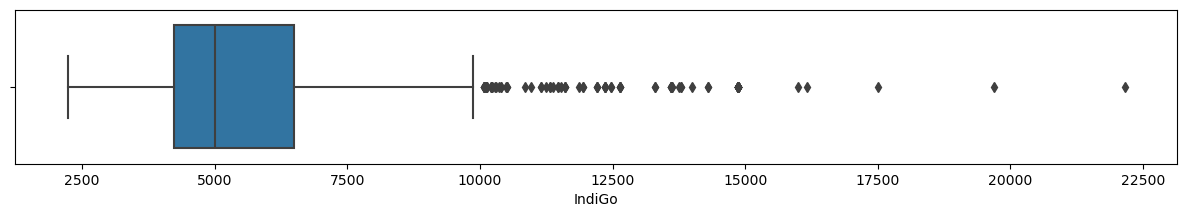

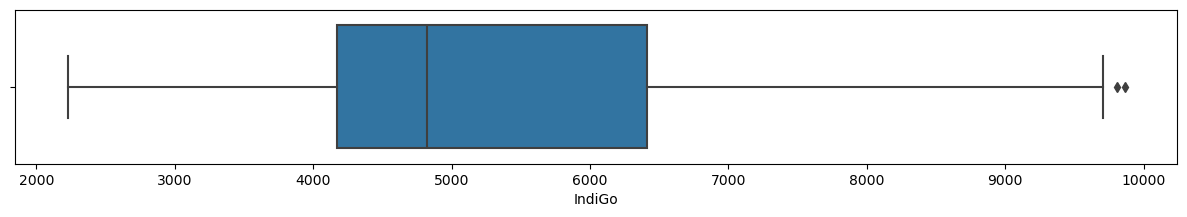

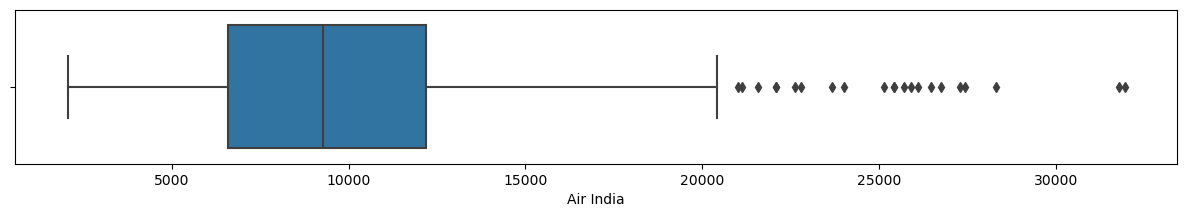

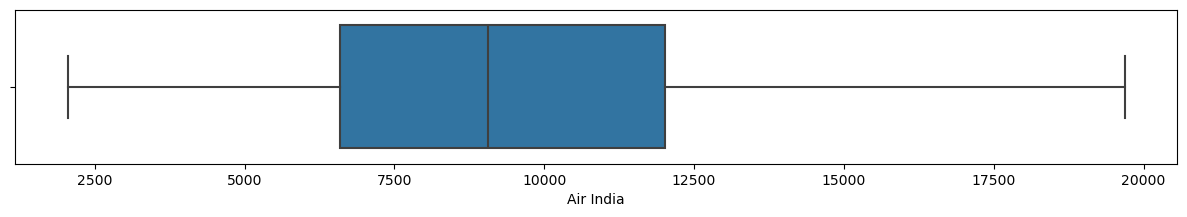

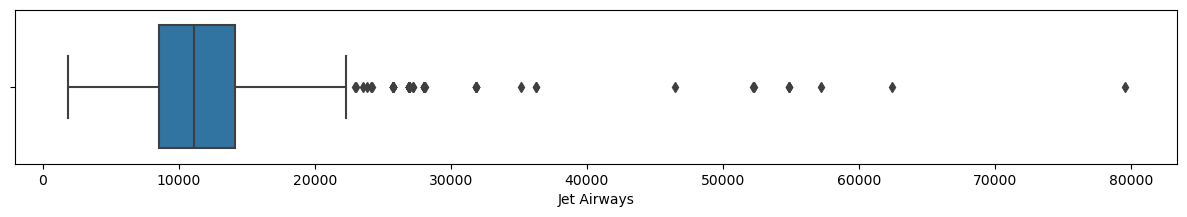

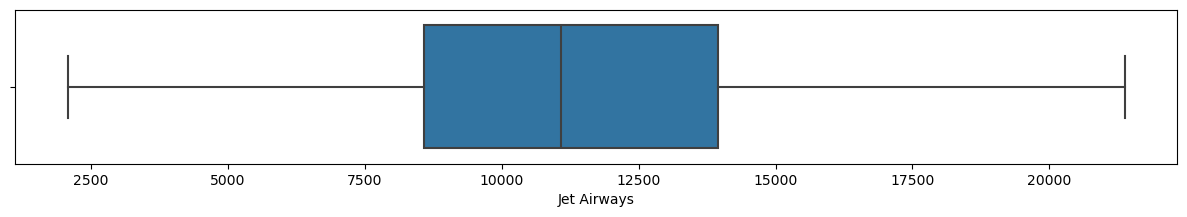

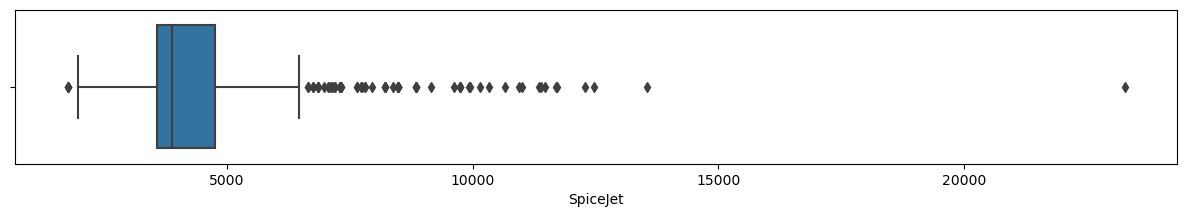

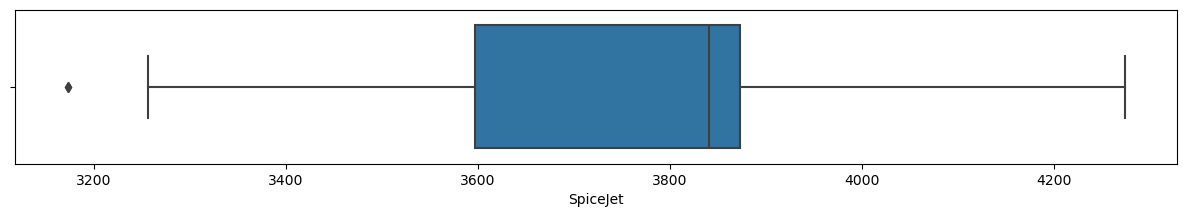

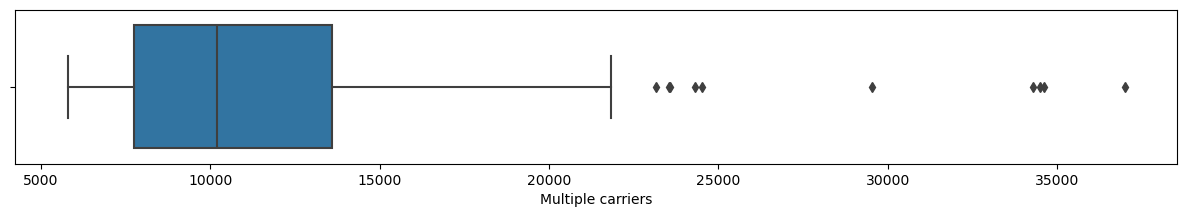

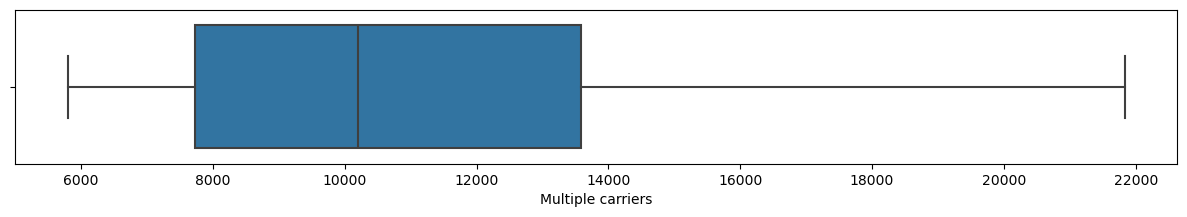

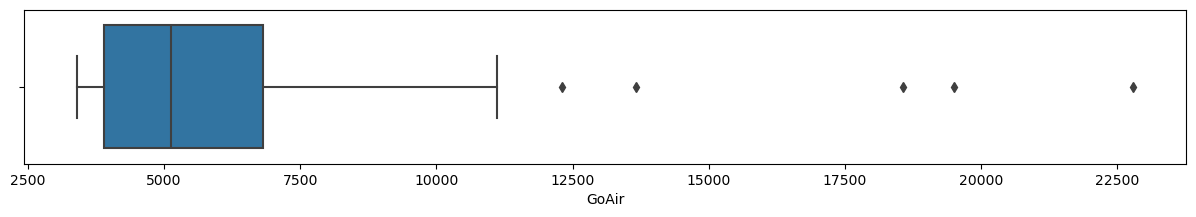

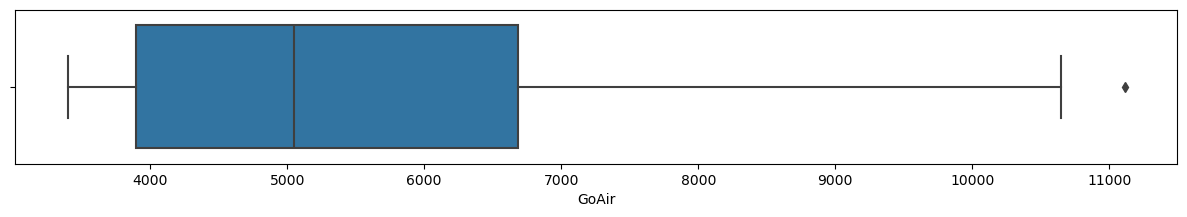

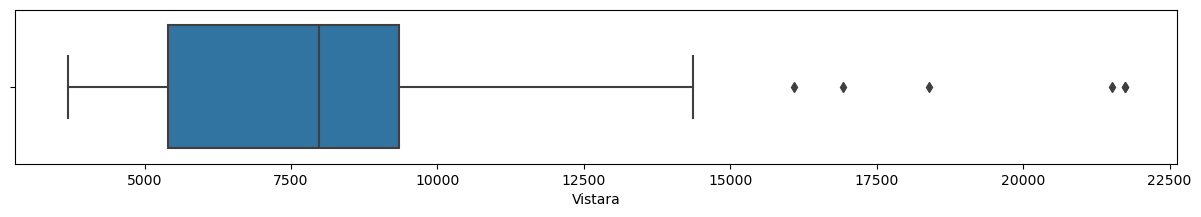

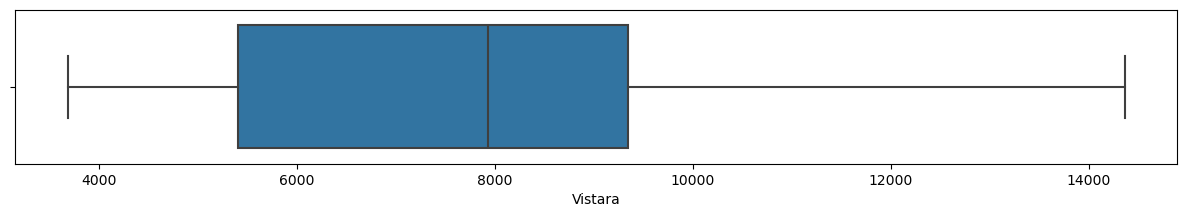

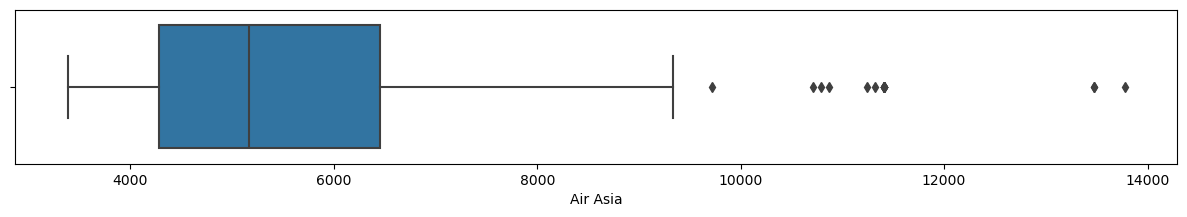

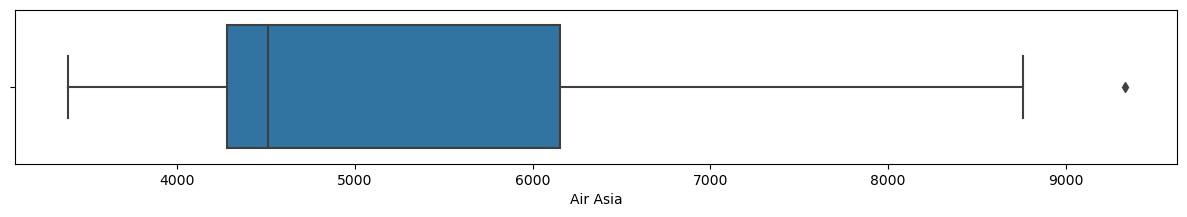

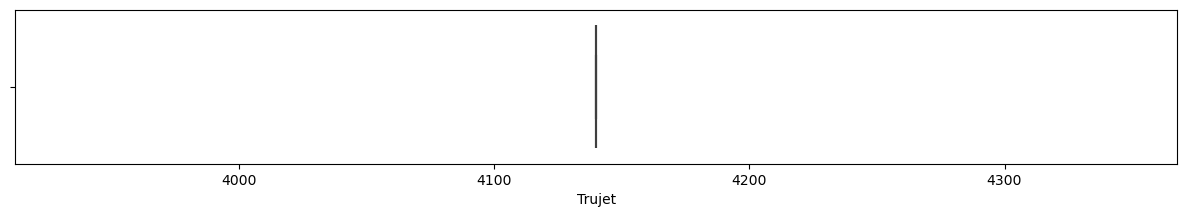

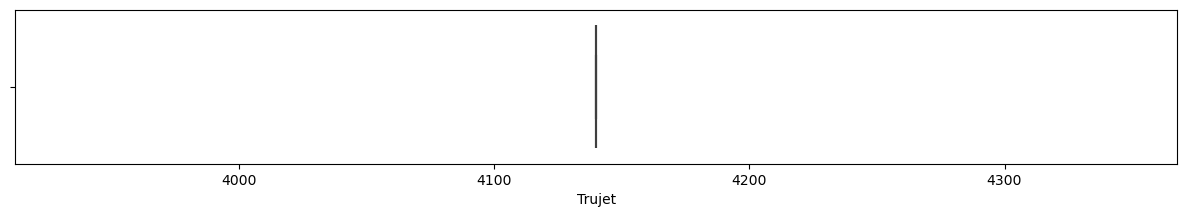

In [73]:
# Remove Outlier


df['Airline'].unique()

airlineName = { 'IndiGo':      [0.25,0.75],
                "Air India":   [0.27,0.75],
                'Jet Airways': [0.27,0.75],
                'SpiceJet':    [0.20,0.45],
                'Multiple carriers':[0.20,0.80],
                'GoAir':       [0.20,0.75],
                'Vistara':     [0.20,0.75],
                'Air Asia':    [0.25,0.75],
                'Trujet':       [0,0]

              }


final_df = pd.DataFrame(columns=list(df.columns))
final_df
list(df.columns)

import pandas as pd


for key,value in airlineName.items():
    airDataSet = ""
    airDataSet = df[df['Airline'] == key]
    airDataSet
    plt.figure(figsize=(15,2))
    sns.boxplot(x=airDataSet['Price'])
    plt.xlabel(key)
    q1 = airDataSet['Price'].quantile(value[0])
    q3 = airDataSet['Price'].quantile(value[1])
    IQR = q3-q1
    lowerLimit = q1-IQR*1.5
    upperLimit = q3+IQR*1.5
    lowerLimitIndex = airDataSet[airDataSet['Price']<=lowerLimit].index
    upperLimitIndex = airDataSet[airDataSet['Price']>=upperLimit].index
    if airDataSet.shape[0] > 5 : 
        airDataSet.drop(lowerLimitIndex,axis=0,inplace=True)
        airDataSet.drop(upperLimitIndex,axis=0,inplace=True)
    else:
        pass

    df[df.index.isin([2878])]

    plt.figure(figsize=(15,2))
    sns.boxplot(x=airDataSet['Price'])
    plt.xlabel(key)

    
    #airDataSet1 = airDataSet1.append(airDataSet, ignore_index=True)  # ignore_index=True resets the index

    final_df = pd.concat([final_df, airDataSet], axis=0)  # axis=0 is the default and means appending vertically


    
final_df


In [74]:
# Save Cleaned DATA

final_df


,Airline,Source,Destination,Total_Stops,Day,Month,Year,Dept_Hour,Dept_Minute,Arr_Hour,Arr_Minute,hoursMinutes,Price
0,IndiGo,Banglore,Delhi,non-stop,24,3,2019,20,20,1,10,170,3897
3,IndiGo,Kolkata,Banglore,1 stop,12,5,2019,5,5,23,30,325,6218
11,IndiGo,Kolkata,Banglore,non-stop,18,4,2019,20,20,22,55,155,4174
14,IndiGo,Kolkata,Banglore,non-stop,24,4,2019,15,15,19,50,155,4804
22,IndiGo,Banglore,Delhi,non-stop,3,4,2019,0,0,6,50,170,3943
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10503,Air Asia,Delhi,Cochin,1 stop,12,6,2019,55,55,22,25,870,6152
10549,Air Asia,Kolkata,Banglore,non-stop,12,3,2019,35,35,22,5,150,4384
10589,Air Asia,Banglore,Delhi,non-stop,24,3,2019,25,25,2,10,165,3383
10677,Air Asia,Kolkata,Banglore,non-stop,9,4,2019,55,55,22,25,150,4107


In [75]:
final_df.to_csv("C:\\Users\\SHIVRAJ SHINDE\\JupiterWorking\\XL_ML\\02 Projects\\Data\\02_Cleaned\\CleanedDf.csv")


In [76]:
# Read the cleaned data for Encoding
final_df = pd.read_csv(r"C:\\Users\\SHIVRAJ SHINDE\\JupiterWorking\\XL_ML\\02 Projects\\Data\\02_Cleaned\\CleanedDf.csv")
final_df = final_df.drop('Unnamed: 0',axis=1)


In [77]:
# independat Feature
X = final_df.drop(['Price'],axis=1)
X 


,Airline,Source,Destination,Total_Stops,Day,Month,Year,Dept_Hour,Dept_Minute,Arr_Hour,Arr_Minute,hoursMinutes
0,IndiGo,Banglore,Delhi,non-stop,24,3,2019,20,20,1,10,170
1,IndiGo,Kolkata,Banglore,1 stop,12,5,2019,5,5,23,30,325
2,IndiGo,Kolkata,Banglore,non-stop,18,4,2019,20,20,22,55,155
3,IndiGo,Kolkata,Banglore,non-stop,24,4,2019,15,15,19,50,155
4,IndiGo,Banglore,Delhi,non-stop,3,4,2019,0,0,6,50,170
...,...,...,...,...,...,...,...,...,...,...,...,...
9819,Air Asia,Delhi,Cochin,1 stop,12,6,2019,55,55,22,25,870
9820,Air Asia,Kolkata,Banglore,non-stop,12,3,2019,35,35,22,5,150
9821,Air Asia,Banglore,Delhi,non-stop,24,3,2019,25,25,2,10,165
9822,Air Asia,Kolkata,Banglore,non-stop,9,4,2019,55,55,22,25,150


In [78]:
# Dependant Feature
y = final_df['Price']
y


0       3897
1       6218
2       4174
3       4804
4       3943
        ... 
9819    6152
9820    4384
9821    3383
9822    4107
9823    4140
Name: Price, Length: 9824, dtype: int64

In [79]:

from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(independant Feature, DependantFeature, test_size=0.2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train



X_train


,Airline,Source,Destination,Total_Stops,Day,Month,Year,Dept_Hour,Dept_Minute,Arr_Hour,Arr_Minute,hoursMinutes
3206,Air India,Mumbai,Hyderabad,2 stops,12,3,2019,40,40,9,10,810
1052,IndiGo,Delhi,Cochin,1 stop,9,6,2019,35,35,21,0,625
696,IndiGo,Delhi,Cochin,1 stop,21,3,2019,0,0,7,45,345
1597,IndiGo,Delhi,Cochin,non-stop,1,4,2019,20,20,17,35,195
8,IndiGo,Delhi,Cochin,1 stop,27,6,2019,35,35,21,0,625
...,...,...,...,...,...,...,...,...,...,...,...,...
5734,Jet Airways,Banglore,Delhi,1 stop,6,3,2019,55,55,23,0,845
5191,Jet Airways,Delhi,Cochin,1 stop,6,3,2019,55,55,4,25,870
5390,Jet Airways,Kolkata,Banglore,1 stop,21,5,2019,0,0,22,35,1595
860,IndiGo,Delhi,Cochin,1 stop,9,3,2019,35,35,16,10,515


# Encoding and Scaling


In [80]:
# Import all required Liabraries
# import one hot encoding and ordinal Encoding 
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
# import scaling
from sklearn.preprocessing import MinMaxScaler,StandardScaler



# import coulum transformer and pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline,Pipeline



In [81]:
X_train.head(3)


,Airline,Source,Destination,Total_Stops,Day,Month,Year,Dept_Hour,Dept_Minute,Arr_Hour,Arr_Minute,hoursMinutes
3206,Air India,Mumbai,Hyderabad,2 stops,12,3,2019,40,40,9,10,810
1052,IndiGo,Delhi,Cochin,1 stop,9,6,2019,35,35,21,0,625
696,IndiGo,Delhi,Cochin,1 stop,21,3,2019,0,0,7,45,345


In [82]:
# Create Function to for Encoding and Scalling

def methodPreprocessing():
    trf1 = ColumnTransformer([
        ('OneHot',OneHotEncoder(drop='first',handle_unknown='ignore'),[0,1,2])],remainder='passthrough')
    
    trf2 = ColumnTransformer([
        ('Ordinal',OrdinalEncoder(categories=[['non-stop', '1 stop', '2 stops', '3 stops', '4 stops']]),[16])]
         ,remainder='passthrough')
    
    trf3 = ColumnTransformer([
        ('scale', StandardScaler(), slice(25))
    ])
    
    pipe  = make_pipeline(trf1,trf2,trf3)
    return pipe

pipe = methodPreprocessing()



In [83]:
# for train Data

X_train = pipe.fit_transform(X_train)
X_train = pd.DataFrame(X_train)
X_train


,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,1.783910,2.202686,-0.139964,-0.493869,-0.759504,-0.374577,-0.216540,-0.011281,-0.226031,-0.195038,...,4.043363,-0.195038,-0.204979,-1.529369,0.0,0.852974,0.852974,-0.655482,-0.876855,0.328020
1,0.282705,-0.453991,-0.139964,2.024830,-0.759504,-0.374577,-0.216540,-0.011281,-0.226031,-0.195038,...,-0.247319,-0.195038,-0.560252,1.090740,0.0,0.587077,0.587077,1.095217,-1.475466,-0.038384
2,0.282705,-0.453991,-0.139964,2.024830,-0.759504,-0.374577,-0.216540,-0.011281,-0.226031,-0.195038,...,-0.247319,-0.195038,0.860842,-1.529369,0.0,-1.274199,-1.274199,-0.947265,1.218282,-0.592940
3,-1.218499,-0.453991,-0.139964,2.024830,-0.759504,-0.374577,-0.216540,-0.011281,-0.226031,-0.195038,...,-0.247319,-0.195038,-1.507649,-0.656000,0.0,-0.210613,-0.210613,0.511651,0.619671,-0.890024
4,0.282705,-0.453991,-0.139964,2.024830,-0.759504,-0.374577,-0.216540,-0.011281,-0.226031,-0.195038,...,-0.247319,-0.195038,1.571389,1.090740,0.0,0.587077,0.587077,1.095217,-1.475466,-0.038384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7854,0.282705,-0.453991,-0.139964,-0.493869,1.316649,-0.374577,-0.216540,-0.011281,-0.226031,-0.195038,...,-0.247319,-0.195038,-0.915526,-1.529369,0.0,1.650663,1.650663,1.387000,-1.475466,0.397339
7855,0.282705,-0.453991,-0.139964,-0.493869,1.316649,-0.374577,-0.216540,-0.011281,-0.226031,-0.195038,...,-0.247319,-0.195038,-0.915526,-1.529369,0.0,1.650663,1.650663,-1.384940,0.021061,0.446853
7856,0.282705,-0.453991,-0.139964,-0.493869,1.316649,-0.374577,-0.216540,-0.011281,-0.226031,-0.195038,...,-0.247319,-0.195038,0.860842,0.217370,0.0,-1.274199,-1.274199,1.241109,0.619671,1.882758
7857,0.282705,-0.453991,-0.139964,2.024830,-0.759504,-0.374577,-0.216540,-0.011281,-0.226031,-0.195038,...,-0.247319,-0.195038,-0.560252,-1.529369,0.0,0.587077,0.587077,0.365759,-0.876855,-0.256245


In [84]:
X_train.to_csv("Data\\03_Encoded\\X_train.csv")



In [85]:
# for test Data
X_test = pipe.transform(X_test)

X_test = pd.DataFrame(X_test)
X_test
pd.DataFrame(X_test).T


,0,1,2,3,4,5,6,7,8,9,...,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964
0,0.282705,-1.218499,0.282705,-1.218499,-1.218499,0.282705,0.282705,1.783910,0.282705,0.282705,...,0.282705,-1.218499,0.282705,0.282705,0.282705,0.282705,0.282705,-1.218499,-1.218499,1.783910
1,-0.453991,-0.453991,-0.453991,-0.453991,-0.453991,-0.453991,-0.453991,-0.453991,-0.453991,-0.453991,...,-0.453991,-0.453991,-0.453991,-0.453991,-0.453991,-0.453991,-0.453991,2.202686,-0.453991,-0.453991
2,-0.139964,-0.139964,-0.139964,-0.139964,-0.139964,-0.139964,-0.139964,-0.139964,-0.139964,-0.139964,...,-0.139964,-0.139964,-0.139964,-0.139964,-0.139964,-0.139964,-0.139964,-0.139964,-0.139964,-0.139964
3,-0.493869,-0.493869,2.024830,2.024830,2.024830,-0.493869,-0.493869,-0.493869,-0.493869,-0.493869,...,-0.493869,2.024830,-0.493869,-0.493869,-0.493869,-0.493869,-0.493869,-0.493869,2.024830,-0.493869
4,1.316649,-0.759504,-0.759504,-0.759504,-0.759504,1.316649,1.316649,1.316649,1.316649,1.316649,...,1.316649,-0.759504,-0.759504,-0.759504,1.316649,1.316649,-0.759504,-0.759504,-0.759504,1.316649
5,-0.374577,-0.374577,-0.374577,-0.374577,-0.374577,-0.374577,-0.374577,-0.374577,-0.374577,-0.374577,...,-0.374577,-0.374577,2.669681,2.669681,-0.374577,-0.374577,2.669681,-0.374577,-0.374577,-0.374577
6,-0.216540,-0.216540,-0.216540,-0.216540,-0.216540,-0.216540,-0.216540,-0.216540,-0.216540,-0.216540,...,-0.216540,-0.216540,-0.216540,-0.216540,-0.216540,-0.216540,-0.216540,-0.216540,-0.216540,-0.216540
7,-0.011281,-0.011281,-0.011281,-0.011281,-0.011281,-0.011281,-0.011281,-0.011281,-0.011281,-0.011281,...,-0.011281,-0.011281,-0.011281,-0.011281,-0.011281,-0.011281,-0.011281,-0.011281,-0.011281,-0.011281
8,-0.226031,4.424172,-0.226031,-0.226031,-0.226031,-0.226031,-0.226031,-0.226031,-0.226031,-0.226031,...,-0.226031,-0.226031,-0.226031,-0.226031,-0.226031,-0.226031,-0.226031,-0.226031,-0.226031,-0.226031
9,-0.195038,-0.195038,-0.195038,-0.195038,-0.195038,-0.195038,-0.195038,-0.195038,-0.195038,-0.195038,...,-0.195038,5.127201,-0.195038,-0.195038,-0.195038,-0.195038,-0.195038,-0.195038,-0.195038,-0.195038


In [86]:
X_test.to_csv("Data\\03_Encoded\\X_test.csv")



In [87]:


X_test = pd.read_csv("Data\\03_Encoded\\X_test.csv")
X_train = pd.read_csv("Data\\03_Encoded\\X_train.csv")



In [88]:
import numpy as np

X_train = np.array(X_train)
X_train


array([[ 0.00000000e+00,  1.78390960e+00,  2.20268570e+00, ...,
        -6.55481845e-01, -8.76855035e-01,  3.28019549e-01],
       [ 1.00000000e+00,  2.82705451e-01, -4.53991235e-01, ...,
         1.09521716e+00, -1.47546550e+00, -3.83838857e-02],
       [ 2.00000000e+00,  2.82705451e-01, -4.53991235e-01, ...,
        -9.47265013e-01,  1.21828161e+00, -5.92940436e-01],
       ...,
       [ 7.85600000e+03,  2.82705451e-01, -4.53991235e-01, ...,
         1.24110874e+00,  6.19671138e-01,  1.88275845e+00],
       [ 7.85700000e+03,  2.82705451e-01, -4.53991235e-01, ...,
         3.65759241e-01, -8.76855035e-01, -2.56245387e-01],
       [ 7.85800000e+03, -1.21849870e+00, -4.53991235e-01, ...,
        -6.55481845e-01,  3.20365903e-01, -9.69246666e-01]])

In [89]:
X_test = np.array(X_test)
X_test


array([[ 0.00000000e+00,  2.82705451e-01, -4.53991235e-01, ...,
         1.09521716e+00, -1.17616027e+00,  1.65499415e+00],
       [ 1.00000000e+00, -1.21849870e+00, -4.53991235e-01, ...,
         7.39760734e-02, -2.78244566e-01, -9.39538279e-01],
       [ 2.00000000e+00,  2.82705451e-01, -4.53991235e-01, ...,
         1.24110874e+00, -5.77549800e-01, -7.21676778e-01],
       ...,
       [ 1.96200000e+03, -1.21849870e+00,  2.20268570e+00, ...,
        -2.17807094e-01,  1.21828161e+00, -9.49441075e-01],
       [ 1.96300000e+03, -1.21849870e+00, -4.53991235e-01, ...,
        -9.47265013e-01, -5.77549800e-01, -9.69246666e-01],
       [ 1.96400000e+03,  1.78390960e+00, -4.53991235e-01, ...,
         8.03433992e-01, -1.47546550e+00,  3.28019549e-01]])

# Model Training

In [90]:
from sklearn.linear_model import LinearRegression
linearRegression = LinearRegression()
linearRegression.fit(X_train,y_train) # Model Train



LinearRegression()

# Train Data

In [91]:
X_train_pred = linearRegression.predict(X_train)
X_train_pred


array([10407.11487746,  6816.31611094,  7655.35432873, ...,
       11289.66110499,  7994.77826558,  3704.18873615])

In [92]:
import numpy as np
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

print('MSE:',metrics.mean_squared_error(y_train,X_train_pred))
print('MAE:',metrics.mean_absolute_error(y_train,X_train_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train,X_train_pred)))



MSE: 5397374.27736475
MAE: 1746.529642483543
RMSE: 2323.2249734721668


In [93]:
## R Square and Adjusted R Square
from sklearn.metrics import r2_score

r2 = metrics.r2_score(y_train,X_train_pred)
r2

## Adjusted R square
#display adjusted R-squared

aR2 = 1 - (1-r2)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)

print('r2  : ',r2)
print('aR2 : ', aR2)


r2  :  0.6582553786979499
aR2 :  0.6571208842962832


In [94]:
error_Train = (y_train-X_train_pred)
error_Train


3206    1239.885123
1052    -502.316111
696    -1229.354329
1597    -617.751423
8        -69.508334
           ...     
5734    4920.623333
5191    1370.011266
5390    -445.661105
860    -1320.778266
7270     136.811264
Name: Price, Length: 7859, dtype: float64

<Axes: xlabel='Price', ylabel='Density'>

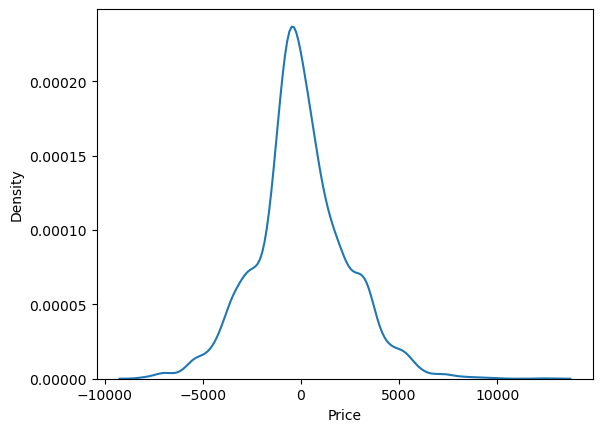

In [95]:
# Normally distribution of Errors:
sns.kdeplot(error_Train)


<Axes: ylabel='Price'>

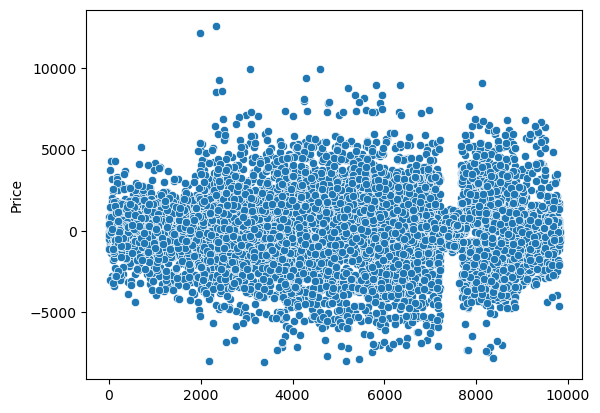

In [96]:
# Homoscedasticity (Constant Variance) of residuals(Error): 
sns.scatterplot(error_Train)


# On Test Data

In [97]:
y_Test_pred = linearRegression.predict(X_test)
y_Test_pred


array([11514.72599796,  6063.49836997,  7369.73449703, ...,
        6062.23964789,  3978.28916051, 12903.80717458])

In [98]:
'''Preformance Metrix'''
import numpy as np
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

import numpy as np
from sklearn import metrics



In [99]:
from sklearn.metrics import r2_score


In [100]:
error = (y_test-y_Test_pred)
error


6913    -811.725998
9372   -1395.498370
647    -1670.734497
1393     682.748953
360      328.735623
           ...     
6954    2027.837416
7735    1091.137475
3370      58.760352
461      825.710839
4375   -2535.807175
Name: Price, Length: 1965, dtype: float64

<Axes: xlabel='Price', ylabel='Density'>

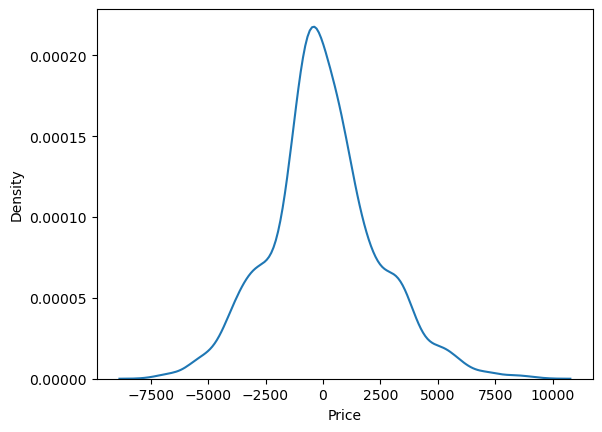

In [101]:
# Normally distribution of Errors:
sns.kdeplot(error)


<Axes: ylabel='Price'>

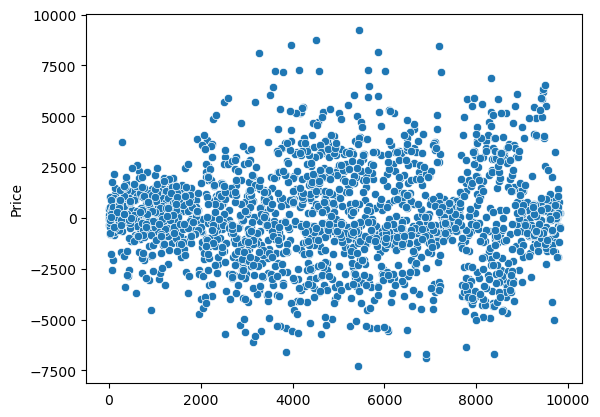

In [102]:
# Homoscedasticity (Constant Variance) of residuals(Error): 
sns.scatterplot(error)


In [103]:
import pickle

with open('linear_regression_model.pkl', 'wb') as file:
    pickle.dump(linearRegression, file)

print("Model saved as 'linear_regression_model.pkl'")


Model saved as 'linear_regression_model.pkl'


In [104]:
import numpy as np

# Your test data
predictionData_01 = np.array([[0.29513, -0.439141, -0.139609, -0.488058, 1.340918, -0.356351, 
                      -0.290428, -0.010932, -0.224335, -0.192486, -0.837887, -0.612842, 
                      -0.269325, -0.837887, 1.932945, -0.269325, -0.192486, -0.889078, 
                      -1.468318, 0, -1.290458, -1.290458, -0.778862, -0.594844, 1.650211,1.650211]])

with open('linear_regression_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)


# Make predictions using the loaded model
predictions = loaded_model.predict(predictionData_01)

# Print the predictions
print("Predictions:", float(predictions))


Predictions: 8041.543608253918


In [105]:
X_train


array([[ 0.00000000e+00,  1.78390960e+00,  2.20268570e+00, ...,
        -6.55481845e-01, -8.76855035e-01,  3.28019549e-01],
       [ 1.00000000e+00,  2.82705451e-01, -4.53991235e-01, ...,
         1.09521716e+00, -1.47546550e+00, -3.83838857e-02],
       [ 2.00000000e+00,  2.82705451e-01, -4.53991235e-01, ...,
        -9.47265013e-01,  1.21828161e+00, -5.92940436e-01],
       ...,
       [ 7.85600000e+03,  2.82705451e-01, -4.53991235e-01, ...,
         1.24110874e+00,  6.19671138e-01,  1.88275845e+00],
       [ 7.85700000e+03,  2.82705451e-01, -4.53991235e-01, ...,
         3.65759241e-01, -8.76855035e-01, -2.56245387e-01],
       [ 7.85800000e+03, -1.21849870e+00, -4.53991235e-01, ...,
        -6.55481845e-01,  3.20365903e-01, -9.69246666e-01]])

In [106]:
# Build the model using Lasso Regression

from sklearn.linear_model import Lasso
lasso_Model = Lasso()

lasso_Model.fit(X_train,y_train)


Lasso()

In [107]:
# get the prediction based on the Train Data
y_train_pred = lasso_Model.predict(X_train)
y_train_pred


array([10411.23702541,  6820.34812544,  7650.98596572, ...,
       11289.36899769,  7992.92420325,  3706.20277892])

In [108]:
# get the prediction based on the Test Data

y_Test_pred = lasso_Model.predict(X_test)
y_Test_pred



array([11514.88654768,  6061.3555511 ,  7366.97897012, ...,
        6058.30787467,  3972.57332272, 12909.93831987])

In [122]:
def print_metrics(y, y_Pred,TrainTest,modelName):
    mse = metrics.mean_squared_error(y, y_Pred)
    mae = metrics.mean_absolute_error(y, y_Pred)
    rmse = np.sqrt(mse)
    
    result = {
        'TrainTest&ModelName': TrainTest + str(modelName),
        'MSE': mse,
        'MAE': mae,
        'RMSE': rmse
    }
    result = pd.DataFrame([result])
    return result

def calculate_r2_and_adjusted_r2(y, y_pred, X,TrainTest,modelName):
    r2 = r2_score(y, y_pred)

    n = len(y)  # Number of observations
    p = X.shape[1]  # Number of predictors (features)
    # Adjusted R² formula
    aR2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    
    result = {
        'TrainTest&ModelName': TrainTest + modelName,
        'R2': r2,
        'Adjusted R2': aR2
    }
    result = pd.DataFrame([result])
    return result



In [123]:
# Predict MSE, MAE, RMSE on Lasso Model Training Data
print_metrics(y_train, y_train_pred,X_train, "Lasso" )


UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('float64'), dtype('<U5')) -> None

In [115]:
# Predict MSE, MAE, RMSE on Lasso Model Testing Data
print_metrics(y_test, y_Test_pred)


TypeError: print_metrics() missing 2 required positional arguments: 'TrainTest' and 'modelName'

In [ ]:
# Predict r2 and adjusted_r2 on Lasso Model Training Data
calculate_r2_and_adjusted_r2(y_train, y_train_pred, X_train)


In [ ]:
# Predict r2 and adjusted_r2 on Lasso Model testing Data
calculate_r2_and_adjusted_r2(y_test, y_Test_pred, X_test)


In [ ]:
# Linear Regression
# Ridge Regression
# Lasso Regression
# ElasticNet


In [ ]:
# With hyper parameter


In [125]:
import mlflow
import mlflow.sklearn
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression




with mlflow.start_run():
    # Initialize and train the model
    linearRegression = LinearRegression()
    linearRegression.fit(X_train, y_train)  # Train the model

    # Make predictions
    y_test_pred = linearRegression.predict(X_test)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_test_pred)
    mae = mean_absolute_error(y_test, y_test_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_test_pred)

    # Adjusted R²
    n = len(y_test)  # Number of observations in the test set
    p = X.shape[1]  # Number of predictors (features)
    aR2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

    # Log parameters and metrics with MLFlow
    mlflow.log_param("Model", "LinearRegression")
    mlflow.log_metric("MSE", mse)
    mlflow.log_metric("MAE", mae)
    mlflow.log_metric("RMSE", rmse)
    mlflow.log_metric("R2", r2)
    mlflow.log_metric("Adjusted R2", aR2)

    # Log the trained model
    mlflow.sklearn.log_model(linearRegression, "linear_regression_model")

    # Print results
    print(f"MSE: {mse}")
    print(f"MAE: {mae}")
    print(f"RMSE: {rmse}")
    print(f"R2: {r2}")
    print(f"Adjusted R2: {aR2}")



2025/01/03 17:23:41 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


MlflowException: When an mlflow-artifacts URI was supplied, the tracking URI must be a valid http or https URI, but it was currently set to file:///C:/Users/SHIVRAJ%20SHINDE/JupiterWorking/XL_ML/02%20Projects/mlruns. Perhaps you forgot to set the tracking URI to the running MLflow server. To set the tracking URI, use either of the following methods:
1. Set the MLFLOW_TRACKING_URI environment variable to the desired tracking URI. `export MLFLOW_TRACKING_URI=http://localhost:5000`
2. Set the tracking URI programmatically by calling `mlflow.set_tracking_uri`. `mlflow.set_tracking_uri('http://localhost:5000')`

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

def createModel(X_train,y_train,X_test, y_test, models,final):
    final = pd.DataFrame(final)
    for values in models.values():
        modelName = values[0]
        parameters = values[1]
        
        rand_search = RandomizedSearchCV(estimator=modelName, param_distributions=parameters, scoring='neg_mean_squared_error', cv=5)
        rand_search.fit(X_train, y_train)
        best_alpha = rand_search.best_params_['alpha']
        best_model = rand_search.best_estimator_
        print(f"Best alpha (regularization strength): {best_alpha}")

        y_Train_pred = best_model.predict(X_train)
        y_Test_pred = best_model.predict(X_test)
        
        dfOne = print_metrics(y_train, y_Train_pred,"Train",modelName)
        dfTwo = calculate_r2_and_adjusted_r2(y_train, y_Train_pred, X_train,"Train",modelName)
        dfThree = print_metrics(y_test, y_Test_pred,"Test",modelName)
        dfFour = calculate_r2_and_adjusted_r2(y_test, y_Test_pred, X_test,"Test",modelName)
        
        final = merge_and_concat(dfOne, dfTwo, dfThree, dfFour,final)

    return final
        
abc = createModel(X_train,y_train,X_test, y_test, models,final)
abc


In [ ]:
import numpy as np
from sklearn.linear_model import Lasso, Ridge, ElasticNet

# Define parameter grids for each model
lasso_param_grid = {
    'alpha': np.logspace(-6, 6, 13),        # Regularization strength (L1)
    'fit_intercept': [True, False],         # Whether to include intercept
    'max_iter': [1000, 2000],               # Maximum number of iterations
    'tol': [1e-4, 1e-3]                     # Tolerance for optimization
}

ridge_param_grid = {
    'alpha': np.logspace(-6, 6, 13),        # Regularization strength (L2)
    'solver': ['auto', 'svd', 'cholesky'],  # Optimization solver
    'fit_intercept': [True, False],         # Whether to include intercept
    'max_iter': [1000, 2000],               # Maximum number of iterations
    'tol': [1e-4, 1e-3]                     # Tolerance for optimization
}

elasticnet_param_grid = {
    'alpha': np.logspace(-6, 6, 13),        # Regularization strength
    'l1_ratio': [0.1, 0.5, 0.9, 1.0],      # Balance between L1 and L2 regularization
    'fit_intercept': [True, False],         # Whether to include intercept
    'max_iter': [1000, 2000],               # Maximum number of iterations
    'tol': [1e-4, 1e-3]                     # Tolerance for optimization
}

# Define a nested dictionary for models and their parameters

models = {
    'Lasso Regression': [Lasso(),lasso_param_grid],
    'Ridge Regression': [Ridge(),ridge_param_grid],
    'ElasticNet Regression':[ElasticNet(),elasticnet_param_grid]
}


final = {
    'TrainTest&ModelName': [],
    'MSE': [],
    'MAE': [],
    'RMSE': [],
    'R2': [],
    'Adjusted R2': []
}
pd.DataFrame(final)


In [ ]:
import pandas as pd

def merge_and_concat(dfThree, dfFour, dfOne, dfTwo,final):
    
    final01 = pd.merge(dfThree, dfFour, on='TrainTest&ModelName', how='outer')
    final02 = pd.merge(dfOne, dfTwo, on='TrainTest&ModelName', how='outer')
    final = pd.concat([final,final01,final02], axis=0)
    return final

